# EDA on the ClosingTransaction dataset that collects all transactions recorded from January 2020 to April 2023.

## Load libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data of IT closing transaction
df = pd.read_csv('../CSV/ClosingTransaction.csv', sep=';', low_memory=False)

# Add name of column to dataframe 
df.columns = ['GjaeRecId', 'AccountingDate', 'CreatedDateTime', 'LedgerDimension', 'GroupChartOfAccountsValue', 'GroupChartOfAccountsName', 'Ledger', 'PostingLayer', 'SubledgerVoucher', 'SubledgerVoucherDataAreaId', 'CreatedBy', 'JournalCategory', 'PostingTypeLabel', 'PostingTypeValue', 'MainAccount', 'Text', 'JournalType', 'JournalTypeLabel', 'NumOfLines', 'CountLedgerJournal', 'TransactionCurrencyAmount', 'TransactionCurrencyCode', 'ClosingActivityDescription', 'ClosingActivityId']


## Convert 'CreatedDateTime' and 'AccountingDate' columns to the correct format

In [3]:
# Convert the 'CreatedDateTime' column to the correct format
df['CreatedDateTime'] = pd.to_datetime(df['CreatedDateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# Convert the 'AccountingDate' column to the correct format
df['AccountingDate'] = pd.to_datetime(df['AccountingDate'], format='%Y-%m-%d %H:%M:%S.%f')

In [4]:
# Show the first 5 rows of the dataframe
pd.set_option('display.max_columns', None)
df.head()

,GjaeRecId,AccountingDate,CreatedDateTime,LedgerDimension,GroupChartOfAccountsValue,GroupChartOfAccountsName,Ledger,PostingLayer,SubledgerVoucher,SubledgerVoucherDataAreaId,CreatedBy,JournalCategory,PostingTypeLabel,PostingTypeValue,MainAccount,Text,JournalType,JournalTypeLabel,NumOfLines,CountLedgerJournal,TransactionCurrencyAmount,TransactionCurrencyCode,ClosingActivityDescription,ClosingActivityId
0,5657242189,2019-12-31,2020-01-01 16:15:26,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029332,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,ROSELLINA PANEBIANCO-2001132-2019-TRATTENUTA C...,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
1,5657242195,2019-12-31,2020-01-01 16:15:26,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029335,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,MARCO LAMANNA-2001135-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
2,5657242196,2019-12-31,2020-01-01 16:15:26,5637175227,L20205,Salary Payable,5637145326,0,4000029335,IT01,annamaria.massara,General journal,LedgerJournal,14,5637145466,MARCO LAMANNA-2001135-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,50.0,EUR,Post all adjustments in ledger,ACT32
3,5657242199,2019-12-31,2020-01-01 16:15:26,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029337,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,RECCARDO SIMONA-2001137-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
4,5657242198,2019-12-31,2020-01-01 16:15:26,5637175227,L20205,Salary Payable,5637145326,0,4000029336,IT01,annamaria.massara,General journal,LedgerJournal,14,5637145466,CORALLO DANIELE-2001136-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,50.0,EUR,Post all adjustments in ledger,ACT32


In [5]:
# Get last CreatedDateTime in df dataset
last_date = df['CreatedDateTime'].max()
print("Last date in dataset: ", last_date)

Last date in dataset:  2023-10-04 15:22:21


In [6]:
# Remove rows where 'CreatedDateTime' is greater than the 2023-04-30
df = df[df['CreatedDateTime'] < '2023-05-01']

In [7]:
# Unique values for each column of df 
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

GjaeRecId: 8306872
AccountingDate: 1297
CreatedDateTime: 229389
LedgerDimension: 327041
GroupChartOfAccountsValue: 263
GroupChartOfAccountsName: 223
Ledger: 5
PostingLayer: 6
SubledgerVoucher: 2208616
SubledgerVoucherDataAreaId: 10
CreatedBy: 99
JournalCategory: 11
PostingTypeLabel: 27
PostingTypeValue: 28
MainAccount: 1842
Text: 633443
JournalType: 10
JournalTypeLabel: 10
NumOfLines: 1115
CountLedgerJournal: 1009
TransactionCurrencyAmount: 795630
TransactionCurrencyCode: 9
ClosingActivityDescription: 14
ClosingActivityId: 14


In [8]:
# print all different values of the column 'PostingTypeLabel'
print(df['PostingTypeLabel'].unique())


['CustBalance' 'LedgerJournal' 'FixedAssetsDebit' 'FixedAssetsCredit'
 'Bank' 'VendBalance' 'CustSettlement' 'PurchPckSlpPurchaseOffsetAccou'
 'PurchOffsetAccountPckSlp' 'Tax' 'PurchPckSlpTax' 'SalesPckSlipRevenue'
 'SalesRevenue' 'SalesPckSlipRevenueOffsetAccou' 'SalesPackingslipTax'
 'VendSettlement' 'PurchExpense' 'ExchRateLoss' 'ExchRateGain'
 'CustRevenue' 'MSTDiffSecond' 'MSTDiff' 'PurchDisc'
 'TransferOpeningClosing' nan 'TaxWithhold' 'DeferredCost'
 'VendPurchLedger']


In [9]:
# Print number of rows where PostingTypeLabel is 'nan'
print(df['PostingTypeLabel'].isna().sum())

108002


## The dataset consists of 8'327'369 rows and 24 columns

In [10]:
# Dimension of dataframe
df.shape

(8327369, 24)

In [11]:
# Type of data in dataframe
df.dtypes

GjaeRecId                              int64
AccountingDate                datetime64[ns]
CreatedDateTime               datetime64[ns]
LedgerDimension                        int64
GroupChartOfAccountsValue             object
GroupChartOfAccountsName              object
Ledger                                 int64
PostingLayer                           int64
SubledgerVoucher                      object
SubledgerVoucherDataAreaId            object
CreatedBy                             object
JournalCategory                       object
PostingTypeLabel                      object
PostingTypeValue                       int64
MainAccount                            int64
Text                                  object
JournalType                          float64
JournalTypeLabel                      object
NumOfLines                           float64
CountLedgerJournal                   float64
TransactionCurrencyAmount            float64
TransactionCurrencyCode               object
ClosingAct

In [12]:
# Change SubledgerVoucherDataAreaId field from lower case to upper case
df['SubledgerVoucherDataAreaId'] = df['SubledgerVoucherDataAreaId'].str.upper()

In [13]:
# Count number of transactions per subledgervoucherdataareaid
df['SubledgerVoucherDataAreaId'].value_counts()

SubledgerVoucherDataAreaId
PL01    2816836
FR13    2589012
GB02    1532214
RO01     983424
IT01     405883
Name: count, dtype: int64

## Histogram of the number of transactions for each different area:
- France (FR)
- Great Britain (GB)
- Italy (IT)
- Poland (PL)
- Romania (RO)

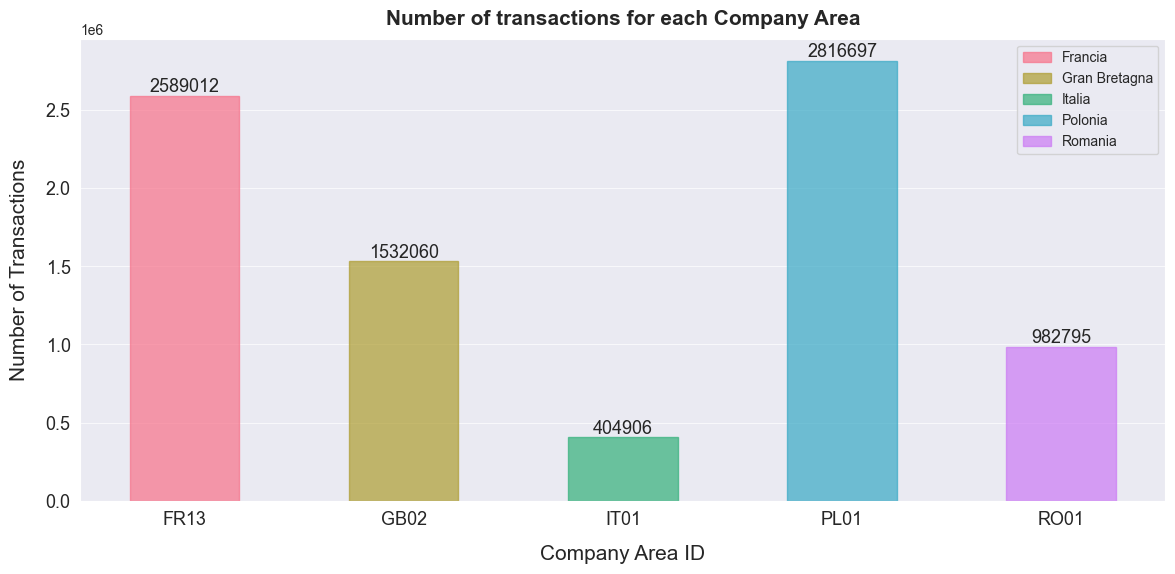

In [80]:
# Set seaborn style
sns.set_style('dark')

# Extract unique area names
area_names = sorted(df['SubledgerVoucherDataAreaId'].unique())

# Define color palette
colors = sns.color_palette("husl", len(area_names))

# Extract transaction counts for each area
area_counts = [df[df['SubledgerVoucherDataAreaId'] == area]['SubledgerVoucherDataAreaId'].count() for area in area_names]

# Plot histogram with seaborn style
plt.figure(figsize=(14, 6))
bars = plt.bar(area_names, area_counts, alpha=0.7, width=0.5, label = ['Francia', 'Gran Bretagna', 'Italia', 'Polonia', 'Romania'])

# Set custom colors for bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Company Area ID', fontsize=15, labelpad=12)
plt.ylabel('Number of Transactions', fontsize=15, labelpad=12)
plt.title('Number of transactions for each Company Area', fontsize=15, fontweight='bold', pad=10)
plt.xticks(ha='center', fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', alpha=0.7)

# Add exact number of transactions on each bar
for i, count in enumerate(area_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=13)

# Show legend
plt.legend()

# Show the plot
plt.show()


In [15]:
# Count number of transactions per CreatedBy
df['CreatedBy'].value_counts()

CreatedBy
angelika.kucharzyk     1892974
laetitia.rodrigues     1277366
jordan.boylen           585507
rana.yacoub             542426
dorota.pagowska         508070
                        ...   
pascal.gaffie                9
stephanie.quiviger           8
hanna.karlsson               6
manoharan.shanmugam          3
sylwia.stefaniuk             2
Name: count, Length: 99, dtype: int64

In [16]:
# Print number of rows where CreatedBy is 'Admin' 
print(df['CreatedBy'].value_counts()['Admin'])

188412


In [17]:
# Count number of transactions per each ActivityId where CreatedBy is 'Admin'
df[df['CreatedBy'] == 'Admin']['ClosingActivityId'].value_counts()

ClosingActivityId
ACT01    106164
ACT07     81876
ACT15       372
Name: count, dtype: int64

## Histogram of the number of transactions created by 'Admin' for each different ClosingActivity
### There are only 188.412 rows created by the admin. i.e. through automated tasks (batch jobs) 

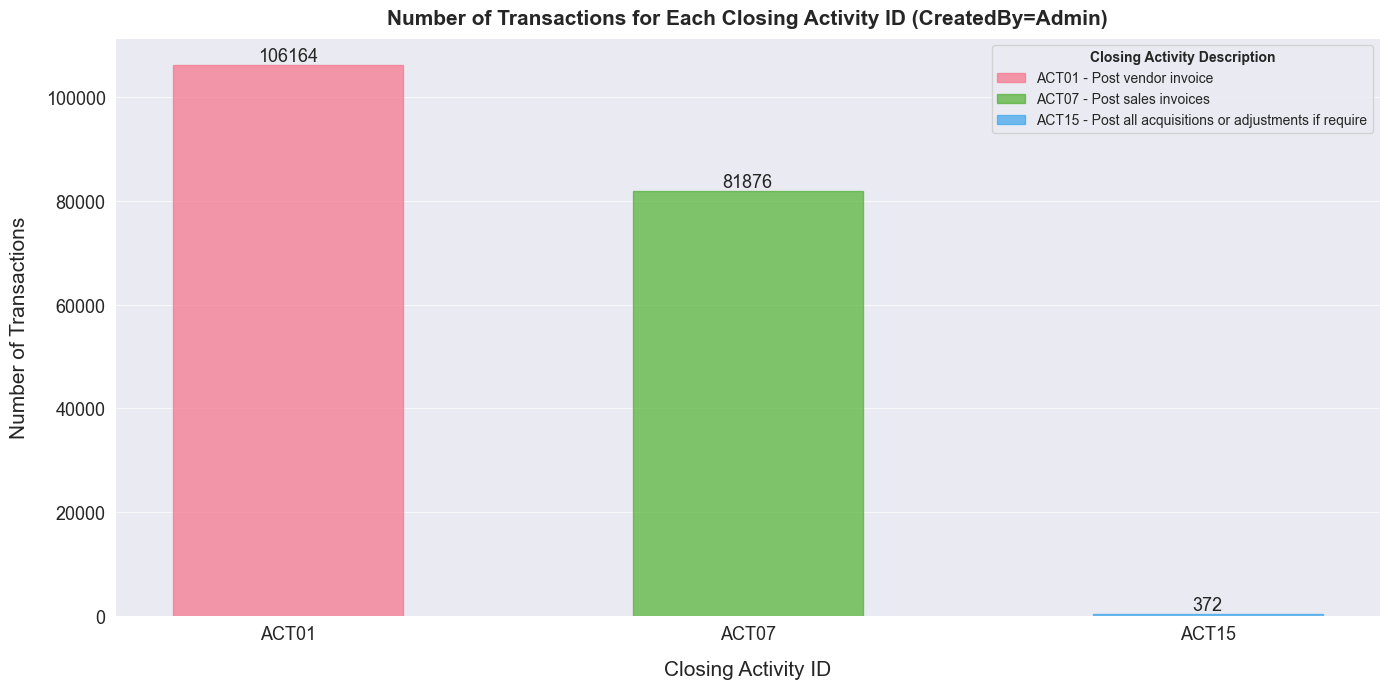

In [79]:
# Set seaborn style
sns.set_style('dark')

# Create a dictionary mapping activity ID to list of descriptions
activity_description_dict = {}
for activity in df[df['CreatedBy'] == 'Admin']['ClosingActivityId'].unique():
    descriptions = df[(df['ClosingActivityId'] == activity) & (df['CreatedBy'] == 'Admin')]['ClosingActivityDescription'].unique()
    activity_description_dict[activity] = descriptions

# Extract unique activity names
activity_names = sorted(df[df['CreatedBy'] == 'Admin']['ClosingActivityId'].unique()) 

# Extract transaction counts for each activity
activity_counts = [df[(df['ClosingActivityId'] == activity) & (df['CreatedBy'] == 'Admin')]['ClosingActivityId'].count() for activity in activity_names]

# Define color map
colors = sns.color_palette("husl", len(activity_names))

# Define legend entries
legend_labels = []
for activity in activity_names:
    descriptions = ", ".join(activity_description_dict[activity])
    legend_labels.append(f'{activity} - {descriptions}')

# Plot histogram with seaborn style
plt.figure(figsize=(14, 7))
bars = plt.bar(activity_names, activity_counts, alpha=0.7, width=0.5, label=legend_labels)

# Set custom colors for bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Closing Activity ID', fontsize=15, labelpad=12)
plt.ylabel('Number of Transactions', fontsize=15, labelpad=12)
plt.title('Number of Transactions for Each Closing Activity ID (CreatedBy=Admin)', fontsize=15, fontweight='bold', pad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', alpha=0.7)

# Add exact number of transactions on each bar
for i, count in enumerate(activity_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=13)

# Plot legend
legend = plt.legend()
legend.set_title('Closing Activity Description', {'weight': 'bold'})

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
# Count number of transactions per ClosingActivityId
df['ClosingActivityId'].value_counts()

ClosingActivityId
ACT32    2224321
ACT15    1738084
ACT17    1662539
ACT03     597300
ACT44     502520
ACT01     470204
ACT09     456635
ACT07     451445
ACT13     111368
ACT04      87660
ACT34      23394
ACT29       1090
ACT16        801
ACT35          8
Name: count, dtype: int64

# Histogram of the number of transactions for each different ClosingActivity (14 different activity)

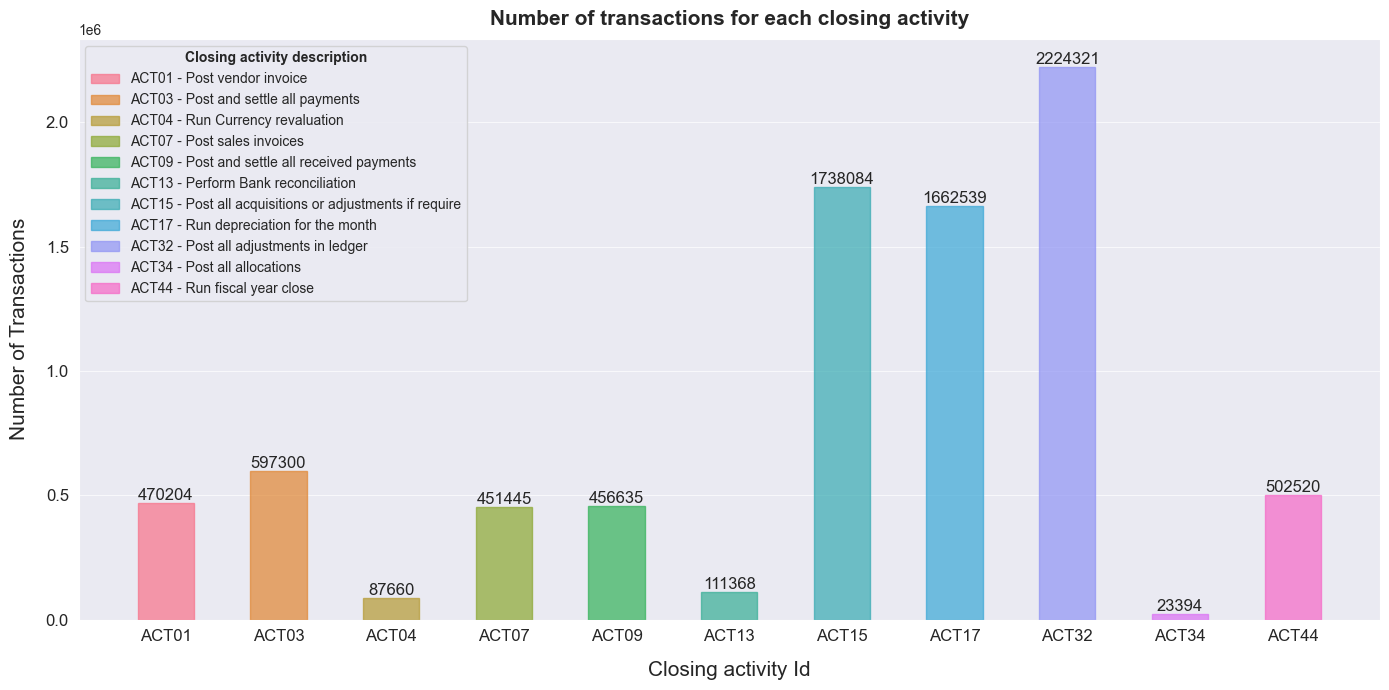

In [82]:
# Set seaborn style
sns.set_style('dark')

# Create a dictionary mapping activity ID to list of descriptions
activity_description_dict = {}
for activity in df['ClosingActivityId'].unique():
    descriptions = df[df['ClosingActivityId'] == activity]['ClosingActivityDescription'].unique()
    activity_description_dict[activity] = descriptions

# Extract unique activity names
activity_names = sorted(df['ClosingActivityId'].unique()) 

# Extract transaction counts for each activity
activity_counts = [df[df['ClosingActivityId'] == activity]['ClosingActivityId'].count() for activity in activity_names]

# Define color map
colors = sns.color_palette("husl", len(activity_names))

# Define legend entries
legend_labels = []
for activity in activity_names:
    descriptions = ", ".join(activity_description_dict[activity])
    legend_labels.append(f'{activity} - {descriptions}')

# Plot histogram with seaborn style
plt.figure(figsize=(14, 7))
bars = plt.bar(activity_names, activity_counts, alpha=0.7, width=0.5, label=legend_labels)

# Set custom colors for bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Closing activity Id', fontsize=15, labelpad=12)
plt.ylabel('Number of Transactions', fontsize=15, labelpad=12)
plt.title('Number of transactions for each closing activity', fontsize=15, fontweight='bold', pad=10)
plt.xticks(ha='center', fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.7)

# Add exact number of transactions on each bar
for i, count in enumerate(activity_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)


# Plot legend
legend = plt.legend()
legend.set_title('Closing activity description', {'weight': 'bold'})

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
# Calculate mean, median, and standard deviation of number of transactions per ActivityId
activity_counts = df['ClosingActivityId'].value_counts()
print(f"Mean: {activity_counts.mean()}")
print(f"Median: {activity_counts.median()}")
print(f"Standard Deviation: {activity_counts.std()}")
print(f"Minimum: {activity_counts.min()}")
print(f"Maximum: {activity_counts.max()}")
print(f"25th percentile: {activity_counts.quantile(0.25)}")
print(f"75th percentile: {activity_counts.quantile(0.75)}")

Mean: 594812.0714285715
Median: 454040.0
Standard Deviation: 736033.8617560038
Minimum: 8
Maximum: 2224321
25th percentile: 39460.5
75th percentile: 573605.0


# Removing activities with few transactions
From the bar plot, it can be seen that activities AC16, ACT29 and ACT35 have few transactions compared to the dimensionality of the entire dataset. So we decided to remove the rows having the previously named ActivityIds, for a total of 1951 rows.

In [22]:
# Remove rows where 'ActivityId' is equal to ACT16 or ACT29 or ACT34 or ACT35
df = df[~df['ClosingActivityId'].isin(['ACT16', 'ACT29', 'ACT35'])]

# Count number of transactions per ClosingActivityId
df['ClosingActivityId'].value_counts()

ClosingActivityId
ACT32    2224321
ACT15    1738084
ACT17    1662539
ACT03     597300
ACT44     502520
ACT01     470204
ACT09     456635
ACT07     451445
ACT13     111368
ACT04      87660
ACT34      23394
Name: count, dtype: int64

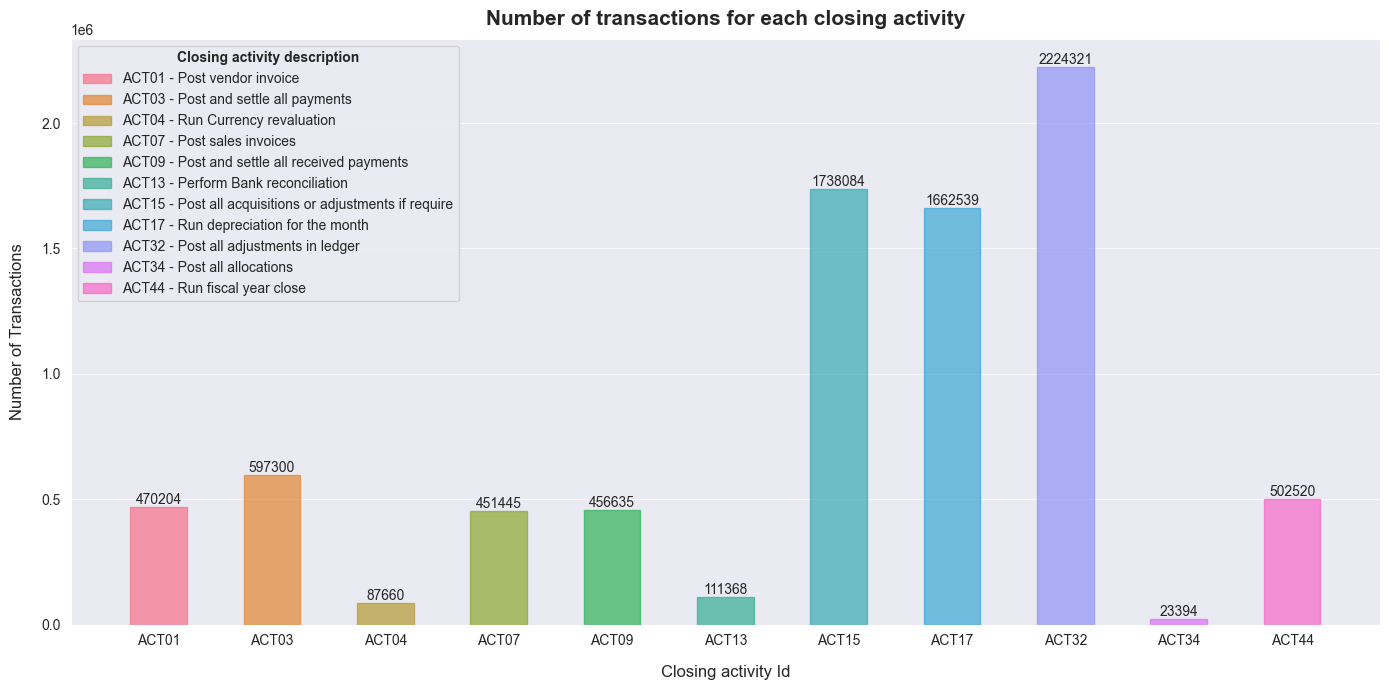

In [23]:
# Set seaborn style
sns.set_style('dark')

# Create a dictionary mapping activity ID to list of descriptions
activity_description_dict = {}
for activity in df['ClosingActivityId'].unique():
    descriptions = df[df['ClosingActivityId'] == activity]['ClosingActivityDescription'].unique()
    activity_description_dict[activity] = descriptions

# Extract unique activity names
activity_names = sorted(df['ClosingActivityId'].unique()) 

# Extract transaction counts for each activity
activity_counts = [df[df['ClosingActivityId'] == activity]['ClosingActivityId'].count() for activity in activity_names]

# Define color map
colors = sns.color_palette("husl", len(activity_names))

# Define legend entries
legend_labels = []
for activity in activity_names:
    descriptions = ", ".join(activity_description_dict[activity])
    legend_labels.append(f'{activity} - {descriptions}')

# Plot histogram with seaborn style
plt.figure(figsize=(14, 7))
bars = plt.bar(activity_names, activity_counts, alpha=0.7, width=0.5, label=legend_labels)

# Set custom colors for bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Closing activity Id', fontsize=12, labelpad=12)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=12)
plt.title('Number of transactions for each closing activity', fontsize=15, fontweight='bold', pad=10)
plt.xticks(ha='center', fontsize=10)  
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)

# Add exact number of transactions on each bar
for i, count in enumerate(activity_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)


# Plot legend
legend = plt.legend()
legend.set_title('Closing activity description', {'weight': 'bold'})

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
# Calculate mean, median, and standard deviation of number of transactions per ActivityId
activity_counts = df['ClosingActivityId'].value_counts()
print(f"Mean: {activity_counts.mean()}")
print(f"Median: {activity_counts.median()}")
print(f"Standard Deviation: {activity_counts.std()}")
print(f"Minimum: {activity_counts.min()}")
print(f"Maximum: {activity_counts.max()}")
print(f"25th percentile: {activity_counts.quantile(0.25)}")
print(f"75th percentile: {activity_counts.quantile(0.75)}")

Mean: 756860.9090909091
Median: 470204.0
Standard Deviation: 754631.7628707998
Minimum: 23394
Maximum: 2224321
25th percentile: 281406.5
75th percentile: 1129919.5


In [25]:
# Set all time of createdDateTime column to 00:00:00 to avoid error
df['CreatedDateTime'] = df['CreatedDateTime'].dt.strftime('%Y/%m/%d 00:00:00')

# Convert CreatedDateTime column to datetime format
df['CreatedDateTime'] = pd.to_datetime(df['CreatedDateTime'], format='%Y/%m/%d %H:%M:%S')
df.head()

,GjaeRecId,AccountingDate,CreatedDateTime,LedgerDimension,GroupChartOfAccountsValue,GroupChartOfAccountsName,Ledger,PostingLayer,SubledgerVoucher,SubledgerVoucherDataAreaId,CreatedBy,JournalCategory,PostingTypeLabel,PostingTypeValue,MainAccount,Text,JournalType,JournalTypeLabel,NumOfLines,CountLedgerJournal,TransactionCurrencyAmount,TransactionCurrencyCode,ClosingActivityDescription,ClosingActivityId
0,5657242189,2019-12-31,2020-01-01,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029332,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,ROSELLINA PANEBIANCO-2001132-2019-TRATTENUTA C...,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
1,5657242195,2019-12-31,2020-01-01,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029335,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,MARCO LAMANNA-2001135-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
2,5657242196,2019-12-31,2020-01-01,5637175227,L20205,Salary Payable,5637145326,0,4000029335,IT01,annamaria.massara,General journal,LedgerJournal,14,5637145466,MARCO LAMANNA-2001135-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,50.0,EUR,Post all adjustments in ledger,ACT32
3,5657242199,2019-12-31,2020-01-01,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029337,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,RECCARDO SIMONA-2001137-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
4,5657242198,2019-12-31,2020-01-01,5637175227,L20205,Salary Payable,5637145326,0,4000029336,IT01,annamaria.massara,General journal,LedgerJournal,14,5637145466,CORALLO DANIELE-2001136-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,50.0,EUR,Post all adjustments in ledger,ACT32


## In this section we are going to create the time series consisting of:
- **item_id**: transaction area
- **timestamp**: the date of the transactions 
- **target**: number of transactions for that day and area

In [26]:
# Create a new df with only CreatedDateTime and count of rows (transactions) per day and the field SubledgerVoucherDataAreaId
df_TS = df.groupby(['SubledgerVoucherDataAreaId', 'CreatedDateTime']).size().reset_index(name='count')

In [27]:
# Change name columns SubledgerVoucherDataAreaId to AreaId, CreatedDateTime to Timestamp and count to Target
df_TS = df_TS.rename(columns={'SubledgerVoucherDataAreaId': 'item_id', 'CreatedDateTime': 'timestamp', 'count': 'target'})
df_TS.head()

,item_id,timestamp,target
0,FR13,2020-01-02,4845
1,FR13,2020-01-03,2815
2,FR13,2020-01-04,3
3,FR13,2020-01-06,858
4,FR13,2020-01-07,509


In [28]:
# Get last date of df_TS dataframe 
last_date = df_TS['timestamp'].max()
print(last_date)

2023-04-30 00:00:00


In [29]:
# Delete all rows where timestamp is greater than 2023-05-01
df_TS = df_TS[df_TS['timestamp'] < '2023-05-01']
last_date = df_TS['timestamp'].max()
print(last_date)


2023-04-30 00:00:00


## All missing days within the dataset are added by setting the target value as 0

In [30]:
# Find all unique combinations of date and item_id
all_dates = pd.date_range(start=df_TS['timestamp'].min(), end=df_TS['timestamp'].max(), freq='D')
all_item_ids = df_TS['item_id'].unique()

# Create an empty DataFrame for all combinations of date and item_id
empty_data = {'timestamp': [], 'item_id': [], 'target': []}
for date in all_dates:
    for item_id in all_item_ids:
        empty_data['timestamp'].append(date)
        empty_data['item_id'].append(item_id)
        empty_data['target'].append(0)
empty_df = pd.DataFrame(empty_data)

# Merge the DataFrames using an outer join to get all rows
merged_df = pd.merge(empty_df, df_TS, on=['timestamp', 'item_id'], how='outer')

# Rename the target_y column to target
merged_df.rename(columns={'target_y': 'target'}, inplace=True)

# Remove the target_x column
merged_df.drop(columns=['target_x'], inplace=True)

# Fill missing values of 'target' with 0
merged_df['target'] = merged_df['target'].fillna(0)

# Sort the resulting DataFrame by date and item_id
df_TS_all = merged_df.sort_values(by=['timestamp', 'item_id']).reset_index(drop=True)

# Change type of target column to int64
df_TS_all['target'] = df_TS_all['target'].astype('int64')

In [31]:
# Show the first 5 rows of the df_TS_all dataframe
df_TS_all.head()

,timestamp,item_id,target
0,2020-01-01,FR13,0
1,2020-01-01,GB02,0
2,2020-01-01,IT01,1239
3,2020-01-01,PL01,0
4,2020-01-01,RO01,0


## The time series consists of 6080 rows and 3 columns: that is, 5 rows for each day (1216 days in total)

In [32]:
# Show dimension of df_TS_all dataframe
df_TS_all.shape

(6080, 3)

In [33]:
# Define the start and end dates
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-04-30')

# Calculate the number of days between the two dates, including both days
num_days = (end_date - start_date).days + 1

# Multiply by 5 to account for 5 observations per day
total_observations = num_days * 5

print("Number of observations between 2020-01-01 and 2023-04-30, inclusive, is:", total_observations)


Number of observations between 2020-01-01 and 2023-04-30, inclusive, is: 6080


## Heatmap of the number of transactions for each area for a single month of the year

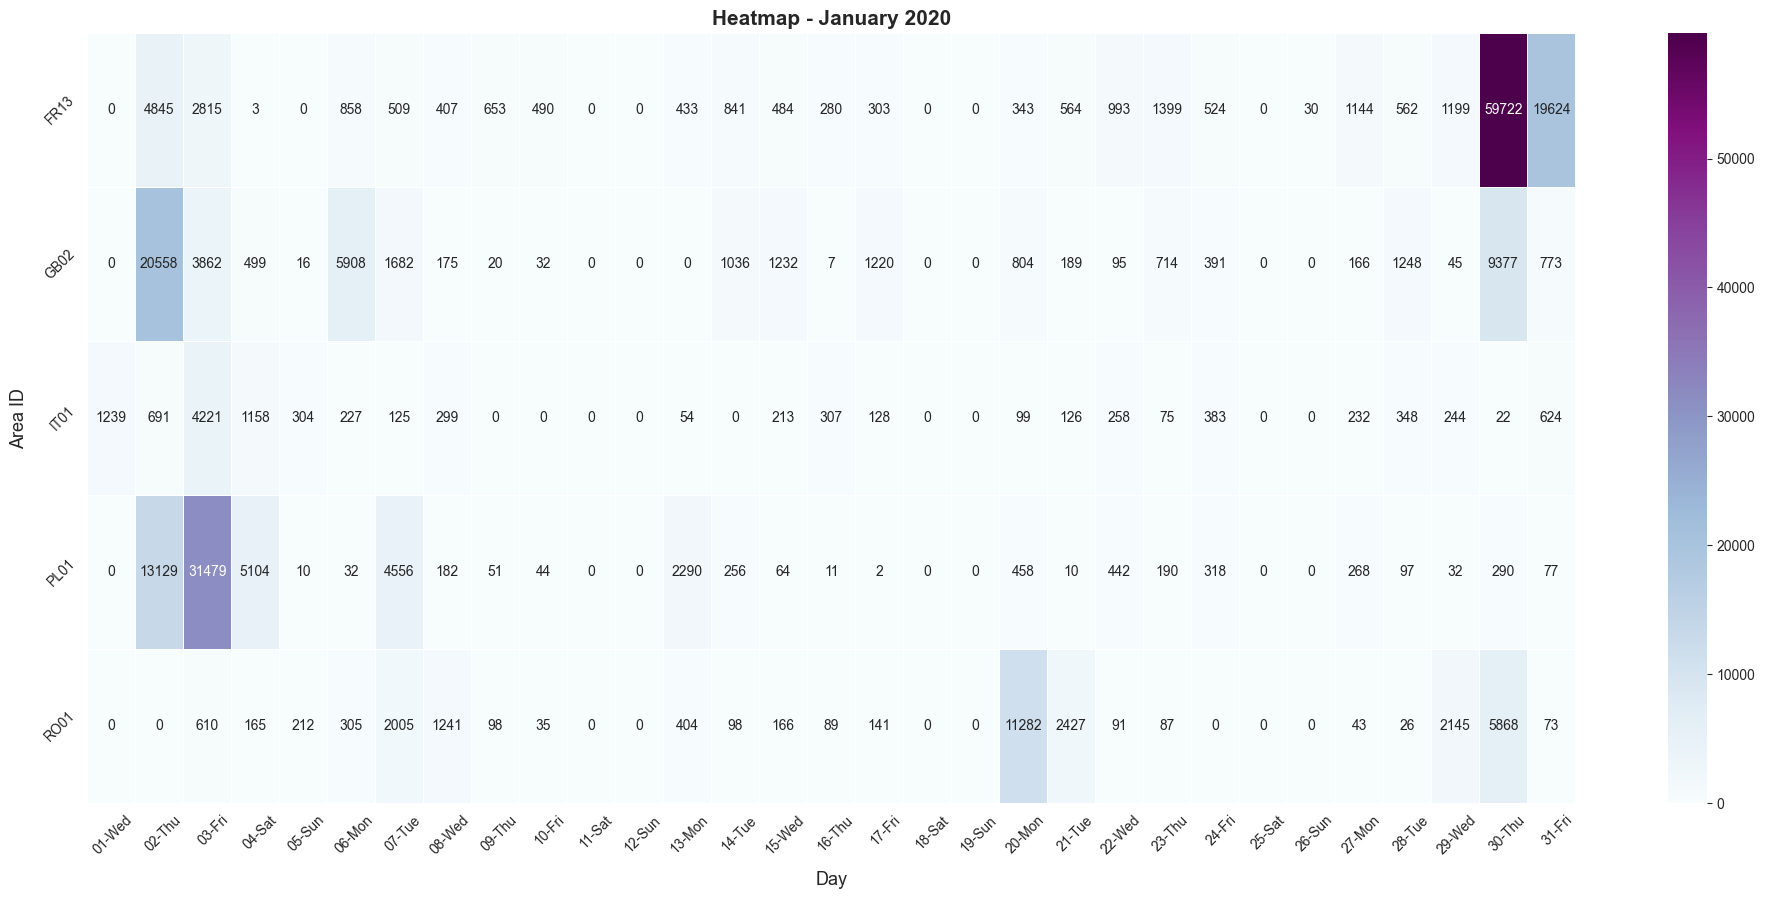

In [34]:
# Select only the data for January 2020
january_2021 = merged_df[(merged_df['timestamp'] >= '2020-01-01') & (merged_df['timestamp'] < '2020-02-01')].copy()

# Extract only the day from the date
january_2021['day'] = january_2021['timestamp'].dt.day

# Create a pivot table with days as columns, item_id as rows, and target as values
pivot_table = january_2021.pivot_table(index='item_id', columns='day', values='target', aggfunc='sum')

# Reorder the columns in chronological order
pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1)

# Create the heatmap with a darker color scale
plt.figure(figsize=(24, 10))
sns.heatmap(pivot_table, cmap='BuPu', annot=True, fmt=".0f", linewidths=.5)

# Set custom ticks for the x-axis
plt.xticks(ticks=range(1, len(pivot_table.columns) + 1),
           labels=[f'{day:02d}-{pd.Timestamp(2020, 1, day).strftime("%a")}' for day in pivot_table.columns],
           rotation=45, ha='right', fontsize=10)

plt.title('Heatmap - January 2020', fontweight='bold', fontsize=15)
plt.xlabel('Day', labelpad=10, fontsize=13)
plt.ylabel('Area ID', labelpad=10, fontsize=13)
plt.yticks(rotation=45, fontsize=10)  
plt.show()


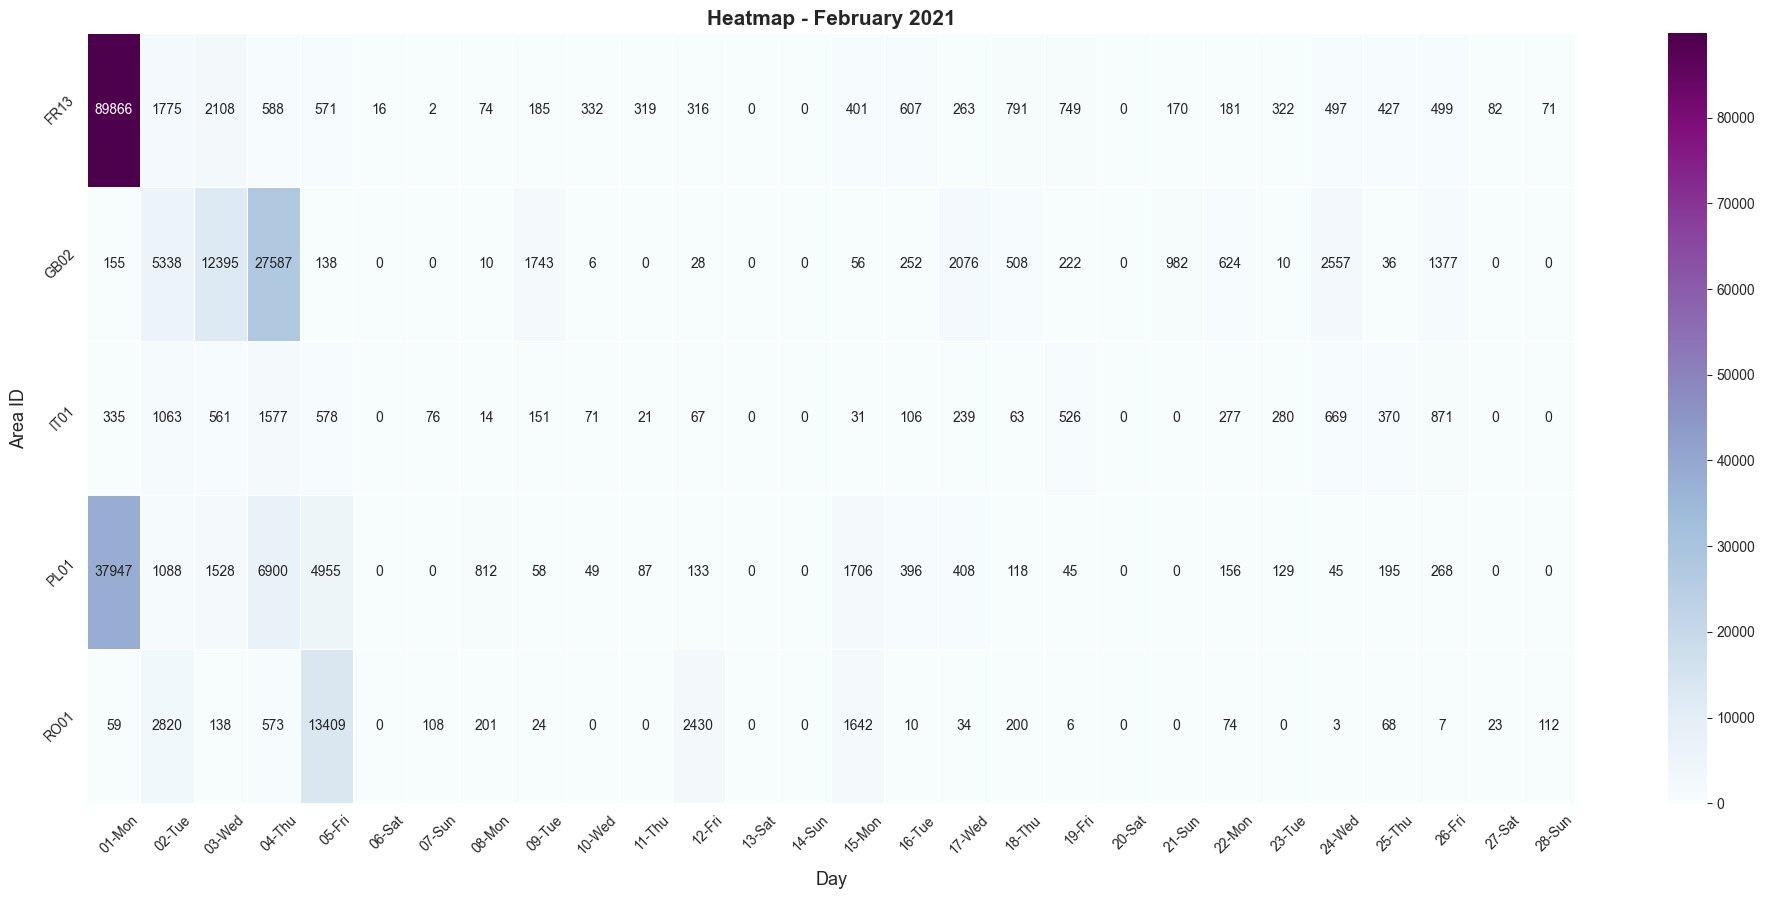

In [35]:
# Select only the data for February 2021
february_2021 = merged_df[(merged_df['timestamp'] >= '2021-02-01') & (merged_df['timestamp'] < '2021-03-01')].copy()

# Extract only the day from the date
february_2021['day'] = february_2021['timestamp'].dt.day

# Create a pivot table with days as columns, item_id as rows, and target as values
pivot_table = february_2021.pivot_table(index='item_id', columns='day', values='target', aggfunc='sum')

# Reorder the columns in chronological order
pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1)

# Create the heatmap with a darker color scale
plt.figure(figsize=(24, 10))
sns.heatmap(pivot_table, cmap='BuPu', annot=True, fmt=".0f", linewidths=.5)

# Set custom ticks for the x-axis
plt.xticks(ticks=range(1, len(pivot_table.columns) + 1),
           labels=[f'{day:02d}-{pd.Timestamp(2021, 2, day).strftime("%a")}' for day in pivot_table.columns],
           rotation=45, ha='right', fontsize=10)

plt.title('Heatmap - February 2021', fontweight='bold', fontsize=15)
plt.xlabel('Day', labelpad=10, fontsize=13)
plt.ylabel('Area ID', labelpad=10, fontsize=13)
plt.yticks(rotation=45, fontsize=10)  
plt.show()


# Handling outlier 

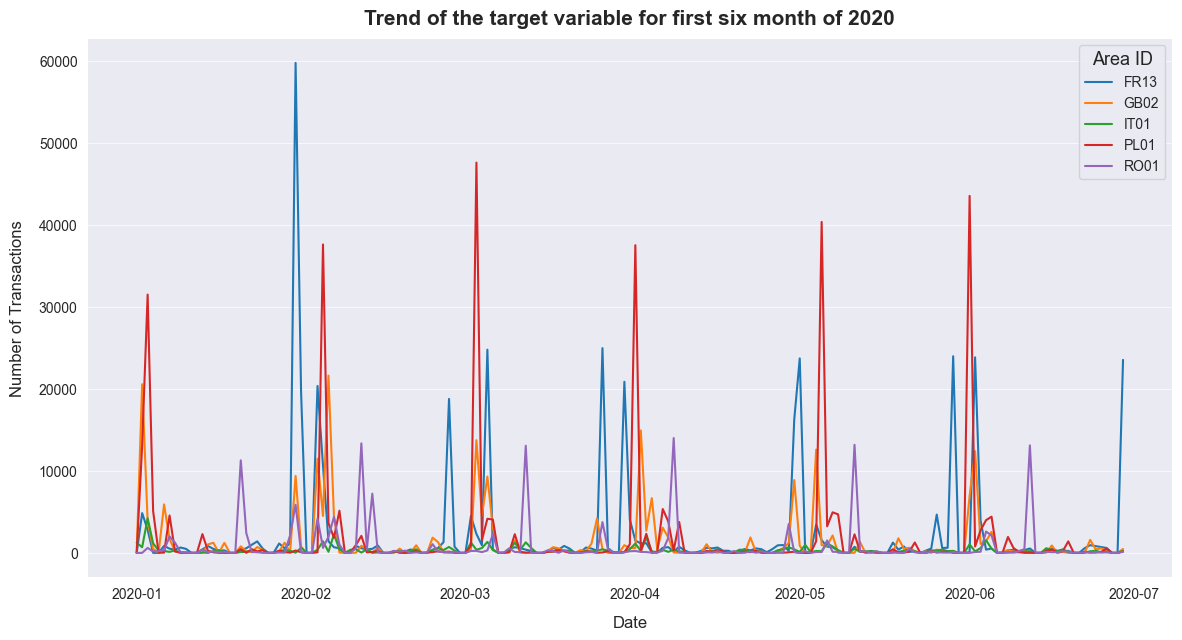

In [36]:
# Show the trend of the target variable for the 2020 year for each item_id
plt.figure(figsize=(14, 7))
for item_id in df_TS_all['item_id'].unique():
    plt.plot(df_TS_all[(df_TS_all['item_id'] == item_id) & (df_TS_all['timestamp'] < '2020-06-30')]['timestamp'],
             df_TS_all[(df_TS_all['item_id'] == item_id) & (df_TS_all['timestamp'] < '2020-06-30')]['target'],
             label=item_id)
    
plt.title('Trend of the target variable for first six month of 2020', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Area ID', title_fontsize='13', fontsize='10')
plt.grid(axis='y', alpha=0.7)
plt.show()

## Plot of the trend in the number of transactions for closing activity number 44 (i.e., those concerning annual fiscal closing)

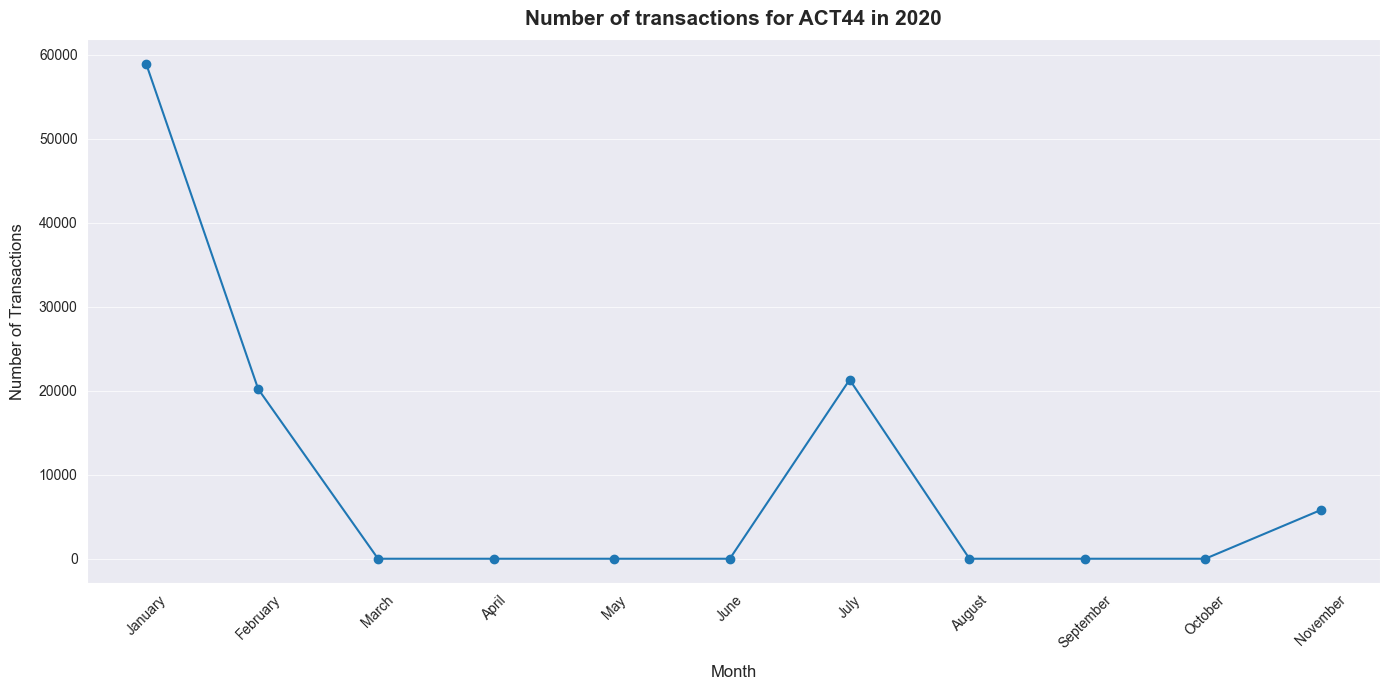

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Count number of transactions where ClosingActivityId is equal to 'ACT44' for each day in 2020
df_ACT44_2020 = df[df['ClosingActivityId'] == 'ACT44']
df_ACT44_2020 = df_ACT44_2020[(df_ACT44_2020['CreatedDateTime'] >= '2020-01-01') & (df_ACT44_2020['CreatedDateTime'] < '2021-01-01')]
df_ACT44_2020['CreatedDateTime'] = pd.to_datetime(df_ACT44_2020['CreatedDateTime'])

# Group by month and count transactions
df_ACT44_2020_monthly = df_ACT44_2020.resample('M', on='CreatedDateTime').size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_ACT44_2020_monthly['CreatedDateTime'], df_ACT44_2020_monthly['count'], marker='o', linestyle='-')
plt.title('Number of transactions for ACT44 in 2020', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(df_ACT44_2020_monthly['CreatedDateTime'], [x.strftime('%B') for x in df_ACT44_2020_monthly['CreatedDateTime']], rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


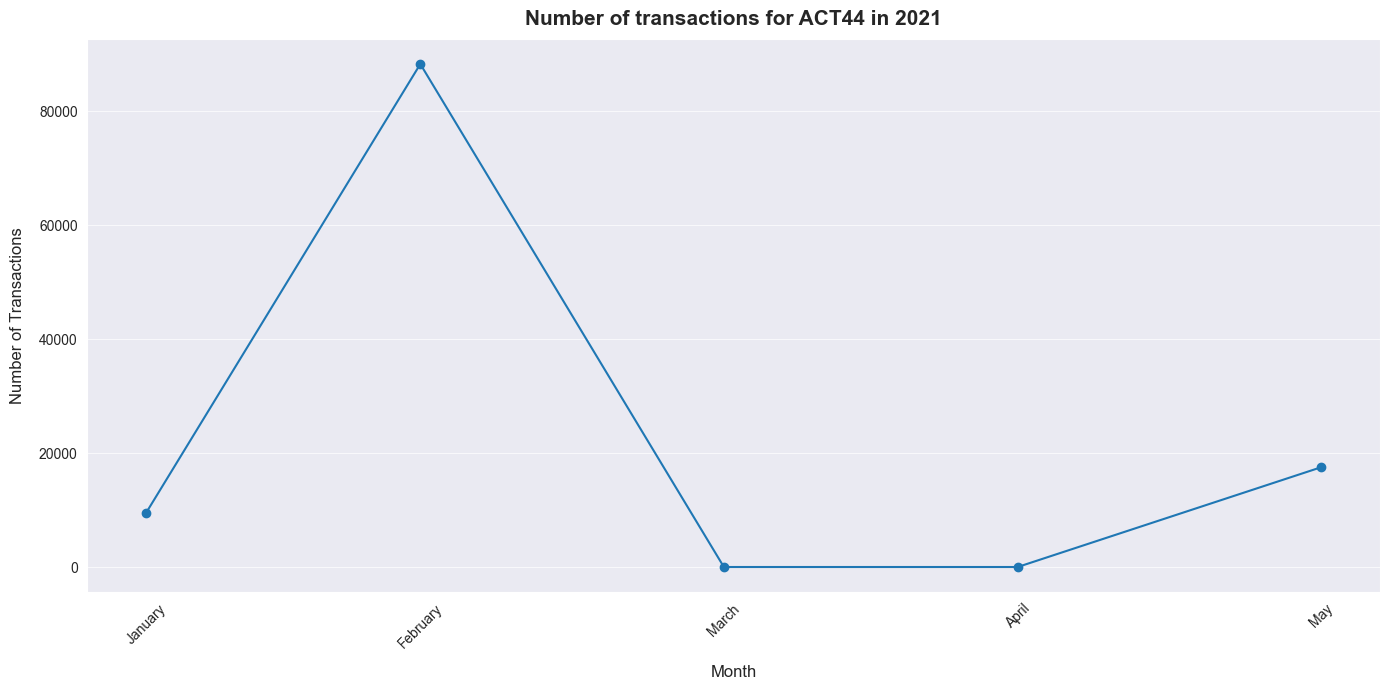

In [38]:
# Count number of transactions where ClosingActivityId is equal to 'ACT44' for each day in 2021
df_ACT44_2021 = df[df['ClosingActivityId'] == 'ACT44']
df_ACT44_2021 = df_ACT44_2021[(df_ACT44_2021['CreatedDateTime'] >= '2021-01-01') & (df_ACT44_2021['CreatedDateTime'] < '2022-01-01')]
df_ACT44_2021['CreatedDateTime'] = pd.to_datetime(df_ACT44_2021['CreatedDateTime'])

# Group by month and count transactions
df_ACT44_2021_monthly = df_ACT44_2021.resample('M', on='CreatedDateTime').size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_ACT44_2021_monthly['CreatedDateTime'], df_ACT44_2021_monthly['count'], marker='o', linestyle='-')
plt.title('Number of transactions for ACT44 in 2021', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(df_ACT44_2021_monthly['CreatedDateTime'], [x.strftime('%B') for x in df_ACT44_2021_monthly['CreatedDateTime']], rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


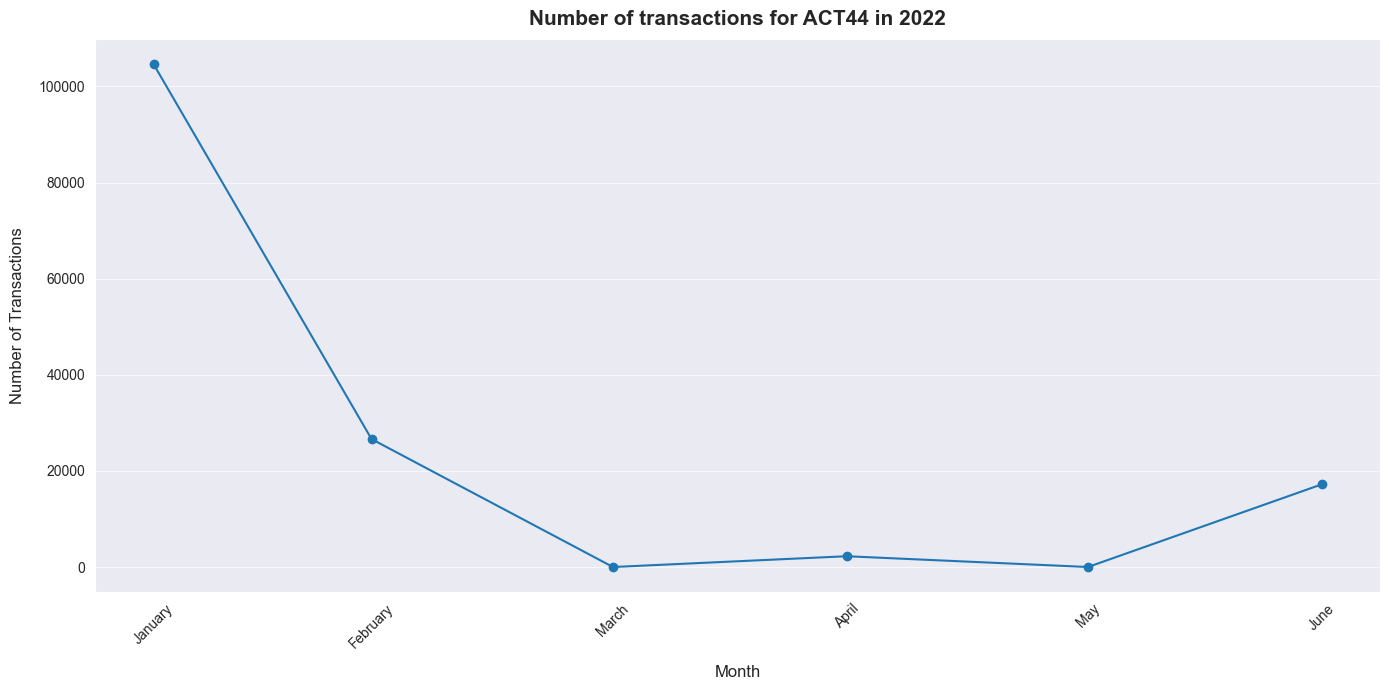

In [39]:
# Count number of transactions where ClosingActivityId is equal to 'ACT44' for each day in 2022
df_ACT44_2022 = df[df['ClosingActivityId'] == 'ACT44']
df_ACT44_2022 = df_ACT44_2022[(df_ACT44_2022['CreatedDateTime'] >= '2022-01-01') & (df_ACT44_2022['CreatedDateTime'] < '2023-01-01')]
df_ACT44_2022['CreatedDateTime'] = pd.to_datetime(df_ACT44_2022['CreatedDateTime'])

# Group by month and count transactions
df_ACT44_2022_monthly = df_ACT44_2022.resample('M', on='CreatedDateTime').size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_ACT44_2022_monthly['CreatedDateTime'], df_ACT44_2022_monthly['count'], marker='o', linestyle='-')
plt.title('Number of transactions for ACT44 in 2022', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(df_ACT44_2022_monthly['CreatedDateTime'], [x.strftime('%B') for x in df_ACT44_2022_monthly['CreatedDateTime']], rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

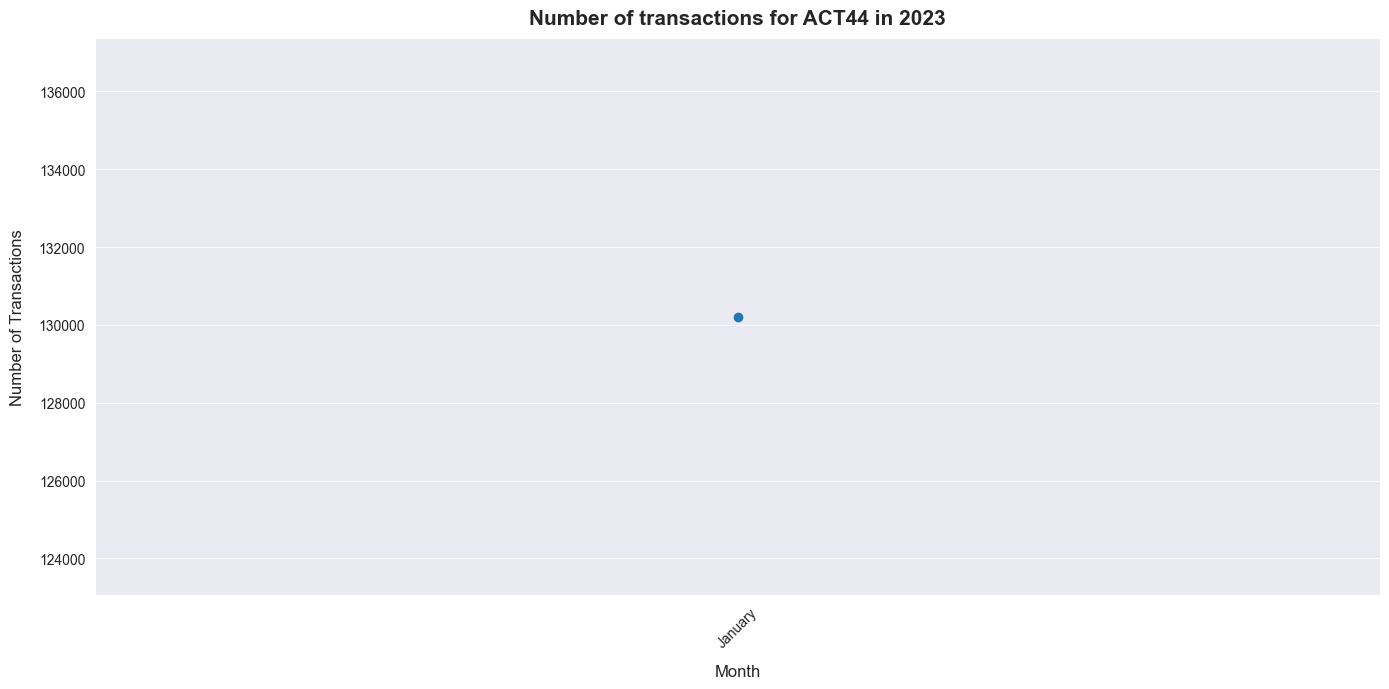

In [40]:
# Filter transactions for ACT44 in 2023
df_ACT44_2023 = df[df['ClosingActivityId'] == 'ACT44']
df_ACT44_2023 = df_ACT44_2023[(df_ACT44_2023['CreatedDateTime'] >= '2023-01-01') & (df_ACT44_2023['CreatedDateTime'] < '2024-01-01')]
df_ACT44_2023['CreatedDateTime'] = pd.to_datetime(df_ACT44_2023['CreatedDateTime'])

# Group by month and count transactions
df_ACT44_2023_monthly = df_ACT44_2023.resample('M', on='CreatedDateTime').size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_ACT44_2023_monthly['CreatedDateTime'], df_ACT44_2023_monthly['count'], marker='o', linestyle='-')
plt.title('Number of transactions for ACT44 in 2023', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(df_ACT44_2023_monthly['CreatedDateTime'], [x.strftime('%B') for x in df_ACT44_2023_monthly['CreatedDateTime']], rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
# Info about df_TS_all dataframe
df_TS_all['target'].describe()

count     6080.000000
mean      1369.320724
std       5379.955049
min          0.000000
25%          0.000000
50%        151.500000
75%        562.000000
max      98774.000000
Name: target, dtype: float64

In [42]:
# Number of value of 0 in target column
print(df_TS_all['target'].value_counts()[0])

1533


In [43]:
# Print row where target is greater than 50000
print(df_TS_all[df_TS_all['target'] > 50000])


      timestamp item_id  target
145  2020-01-30    FR13   59722
1985 2021-02-01    FR13   89866
3508 2021-12-02    PL01   98774
3785 2022-01-27    FR13   96452
4353 2022-05-20    PL01   50678
4578 2022-07-04    PL01   51846
4723 2022-08-02    PL01   58683
4878 2022-09-02    PL01   57308
5033 2022-10-03    PL01   50052
5193 2022-11-04    PL01   59992
5348 2022-12-05    PL01   63522
5478 2022-12-31    PL01   54176
5590 2023-01-23    FR13   68017
5643 2023-02-02    PL01   55118
5778 2023-03-01    PL01   55261
5948 2023-04-04    PL01   58738
6068 2023-04-28    PL01   54440


In [44]:
# Count number of transactions per ActivityId in df dataset where CreatedDateTime is 2021-12-02 and SubledgerVoucherDataAreaId is equal to 'PL01'
df[(df['CreatedDateTime'] == '2021-12-02') & (df['SubledgerVoucherDataAreaId'] == 'PL01')]['ClosingActivityId'].value_counts()

ClosingActivityId
ACT15    48498
ACT17    48321
ACT32     1061
ACT03      785
ACT07       64
ACT01       45
Name: count, dtype: int64

## Decomposition of the time series into three components:
- Trend
- Seasonal 
- Residual

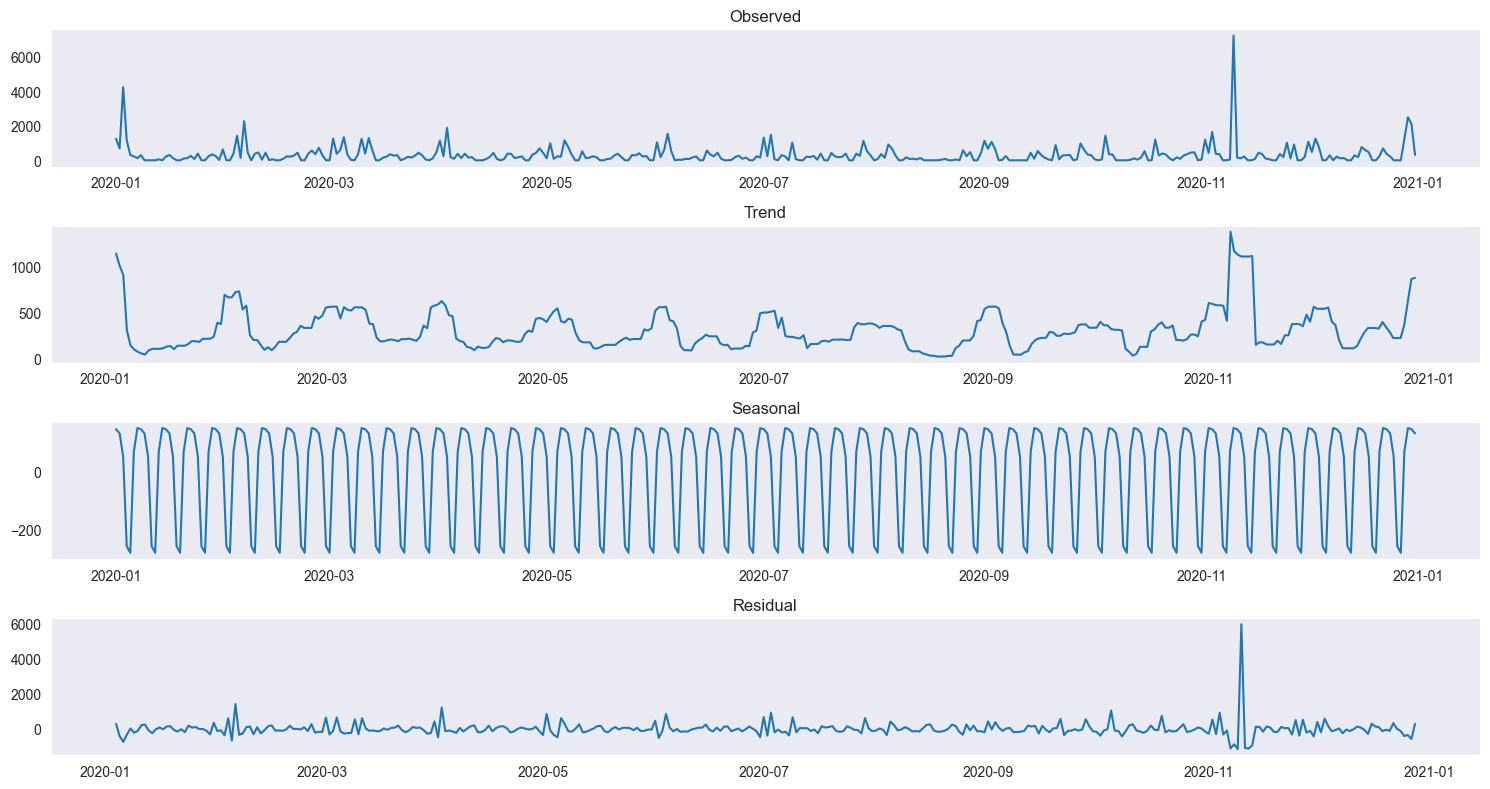

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Copu df_TS_all dataframe to df_TS_all_IT01
df_TS_all_IT01 = df_TS_all.copy()

# Ensure that the 'timestamp' column is in datetime format
df_TS_all_IT01['timestamp'] = pd.to_datetime(df_TS_all_IT01['timestamp'])

# Set the 'timestamp' column as the DataFrame index
df_TS_all_IT01.set_index('timestamp', inplace=True)

# Select the time series for the item_id 'IT01' and for the year 2020
time_series_2020_IT = df_TS_all_IT01[(df_TS_all_IT01['item_id'] == 'IT01') & (df_TS_all_IT01.index.year == 2020)]['target']

# Seasonal decomposition
result = seasonal_decompose(time_series_2020_IT, model='additive')

# Plot each component separately
plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')

plt.tight_layout() 
plt.show()


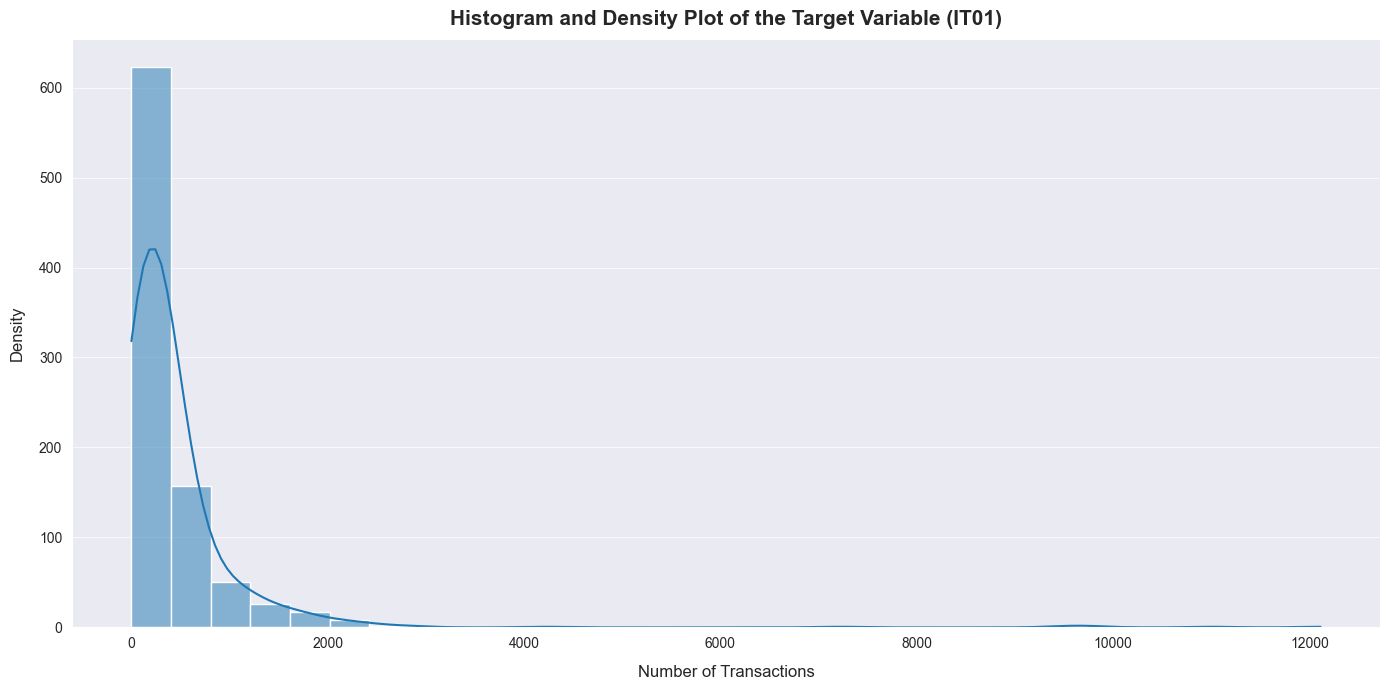

In [46]:
# Histogram and density plot of the target variable in df_TS_all with target greater than 0 and item_id equal to 'IT01'
plt.figure(figsize=(14, 7))
sns.histplot(df_TS_all[(df_TS_all['target'] > 0) & (df_TS_all['item_id'] == 'IT01')]['target'], kde=True, bins=30)
plt.title('Histogram and Density Plot of the Target Variable (IT01)', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Number of Transactions', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()



# Check if the time series is stazionary or not

In [47]:
# Import libraries for adfuller test
from statsmodels.tsa.stattools import adfuller

## IT01

In [48]:
# Define the time series for the item_id 'IT01' of df_TS_all dataframe
time_series_IT01 = df_TS_all[df_TS_all['item_id'] == 'IT01']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_IT01)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")


ADF Statistic: -33.062599147330985
p-value: 0.0
Critical Values:
   1%: -3.435743555099632
   5%: -2.8639217381867486
   10%: -2.568038075665972
The time series is stationary (p-value <= 0.05).


## PL01

In [49]:
# Define the time series for the item_id 'PL01' of df_TS_all dataframe
time_series_PL01 = df_TS_all[df_TS_all['item_id'] == 'PL01']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_PL01)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")

ADF Statistic: -13.56238992588868
p-value: 2.2967302677195323e-25
Critical Values:
   1%: -3.4358478507713777
   5%: -2.863967751840151
   10%: -2.568062580992973
The time series is stationary (p-value <= 0.05).


## FR13

In [50]:
# Define the time series for the item_id 'FR13' of df_TS_all dataframe
time_series_FR13 = df_TS_all[df_TS_all['item_id'] == 'FR13']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_FR13)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")

ADF Statistic: -12.290688931856831
p-value: 7.839801473760483e-23
Critical Values:
   1%: -3.4358478507713777
   5%: -2.863967751840151
   10%: -2.568062580992973
The time series is stationary (p-value <= 0.05).


## GB02


In [51]:
# Define the time series for the item_id 'GB02' of df_TS_all dataframe
time_series_GB02 = df_TS_all[df_TS_all['item_id'] == 'GB02']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_GB02)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")

ADF Statistic: -13.63187402761144
p-value: 1.7171781948363136e-25
Critical Values:
   1%: -3.4358478507713777
   5%: -2.863967751840151
   10%: -2.568062580992973
The time series is stationary (p-value <= 0.05).


## RO01

In [52]:
# Define the time series for the item_id 'RO01' of df_TS_all dataframe
time_series_RO01 = df_TS_all[df_TS_all['item_id'] == 'RO01']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_RO01)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")

ADF Statistic: -11.062224279962614
p-value: 4.77775731968522e-20
Critical Values:
   1%: -3.4358478507713777
   5%: -2.863967751840151
   10%: -2.568062580992973
The time series is stationary (p-value <= 0.05).


### We can conclude that all the time series considered are stationary time series

In [53]:
df_TS_all.head()

# Save the df_TS_all dataframe to a CSV file
df_TS_all.to_csv('../CSV/df_TS_all.csv', index=False)

In [54]:
# print the sum of target column where item_id is equal to 'IT01' and timestamp is from 2022-05-01 to 2022-05-30
print(df_TS_all[(df_TS_all['item_id'] == 'IT01') & (df_TS_all['timestamp'] >= '2022-05-01') & (df_TS_all['timestamp'] <= '2022-05-30')]['target'].sum())


8177


# Aggregating transactions by week and adding the number of transactions for each type

In [55]:
# Create a new df that has createdDateTime, SubledgerVoucherDataAreaId and one column for each ClosingActivityId with the count of transactions for each day and each area 
df_TS_week = df.groupby(['SubledgerVoucherDataAreaId', 'CreatedDateTime', 'ClosingActivityId']).size().reset_index(name='count')

#  Change columns ClosingActivityId and count to one column for each ClosingActivityId with the count of transactions for each day and each area
df_TS_week = df_TS_week.pivot_table(index=['SubledgerVoucherDataAreaId', 'CreatedDateTime'], columns='ClosingActivityId', values='count', fill_value=0).reset_index().rename_axis(None, axis=1)


# Change name columns SubledgerVoucherDataAreaId to item_id, CreatedDateTime to timestamp 
df_TS_week = df_TS_week.rename(columns={'SubledgerVoucherDataAreaId': 'item_id', 'CreatedDateTime': 'timestamp'})

df_TS_week.head()   

,item_id,timestamp,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT34,ACT44
0,FR13,2020-01-02,217.0,284.0,0.0,492.0,188.0,81.0,0.0,0.0,3583.0,0.0,0.0
1,FR13,2020-01-03,1050.0,15.0,0.0,1613.0,1.0,3.0,0.0,0.0,133.0,0.0,0.0
2,FR13,2020-01-04,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FR13,2020-01-06,337.0,212.0,0.0,38.0,45.0,0.0,0.0,0.0,226.0,0.0,0.0
4,FR13,2020-01-07,155.0,43.0,0.0,6.0,12.0,0.0,0.0,0.0,293.0,0.0,0.0


In [56]:
# Delete all rows where timestamp is greater than 2023-05-01
df_TS_week = df_TS_week[df_TS_week['timestamp'] < '2023-05-01']
last_date = df_TS_week['timestamp'].max()
print(last_date)


2023-04-30 00:00:00


In [57]:
# Add a new column to the df df_TS_week called target that contains the sum of all the values of the various ACT columns for each row
df_TS_week['target'] = df_TS_week.iloc[:, 2:].sum(axis=1)

# Show the first 5 rows of the df_TS_week dataframe
df_TS_week.head()

,item_id,timestamp,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT34,ACT44,target
0,FR13,2020-01-02,217.0,284.0,0.0,492.0,188.0,81.0,0.0,0.0,3583.0,0.0,0.0,4845.0
1,FR13,2020-01-03,1050.0,15.0,0.0,1613.0,1.0,3.0,0.0,0.0,133.0,0.0,0.0,2815.0
2,FR13,2020-01-04,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,FR13,2020-01-06,337.0,212.0,0.0,38.0,45.0,0.0,0.0,0.0,226.0,0.0,0.0,858.0
4,FR13,2020-01-07,155.0,43.0,0.0,6.0,12.0,0.0,0.0,0.0,293.0,0.0,0.0,509.0


In [58]:
# Dimension of df_TS_week dataframe
df_TS_week.shape

(4547, 14)

In [59]:
# Group the various rows of df_TS_week by week by setting the day month and year of the Monday of the week as the timestamp
df_TS_week['timestamp'] = df_TS_week['timestamp'] - pd.to_timedelta(df_TS_week['timestamp'].dt.dayofweek, unit='d')

# Group by week and sum the values of the target column and the various ACT columns
df_TS_week = df_TS_week.groupby(['item_id', 'timestamp']).sum().reset_index()

# Show the first 5 rows of the df_TS_week dataframe
df_TS_week.head()

,item_id,timestamp,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT34,ACT44,target
0,FR13,2019-12-30,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0,0.0,7663.0
1,FR13,2020-01-06,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0,0.0,2917.0
2,FR13,2020-01-13,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0,0.0,2341.0
3,FR13,2020-01-20,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0,0.0,3853.0
4,FR13,2020-01-27,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,0.0,58931.0,82251.0


In [60]:
# Check if there are any missing weeks in the dataframe df_TS_week from the 2019-12-30 to 2023-04-30 for each item_id
for item_id in df_TS_week['item_id'].unique():
    print(f"Missing weeks for {item_id}:")
    all_weeks = pd.date_range(start='2019-12-30', end='2023-04-30', freq='W-MON')
    item_weeks = df_TS_week[df_TS_week['item_id'] == item_id]['timestamp'].unique()
    missing_weeks = [week for week in all_weeks if week not in item_weeks]
    print(missing_weeks)


Missing weeks for FR13:
[]
Missing weeks for GB02:
[]
Missing weeks for IT01:
[Timestamp('2021-01-11 00:00:00'), Timestamp('2022-01-10 00:00:00')]
Missing weeks for PL01:
[]
Missing weeks for RO01:
[]


In [61]:
# Count number of week from 2019-12-30 to 2023-04-30 in the calendar
num_weeks = len(pd.date_range(start='2019-12-30', end='2023-04-24', freq='W-MON'))
print(num_weeks)


174


In [62]:
# Count number of rows for each item_id in df_TS_week
df_TS_week['item_id'].value_counts()

item_id
FR13    174
GB02    174
PL01    174
RO01    174
IT01    172
Name: count, dtype: int64

# Correlation Matrix

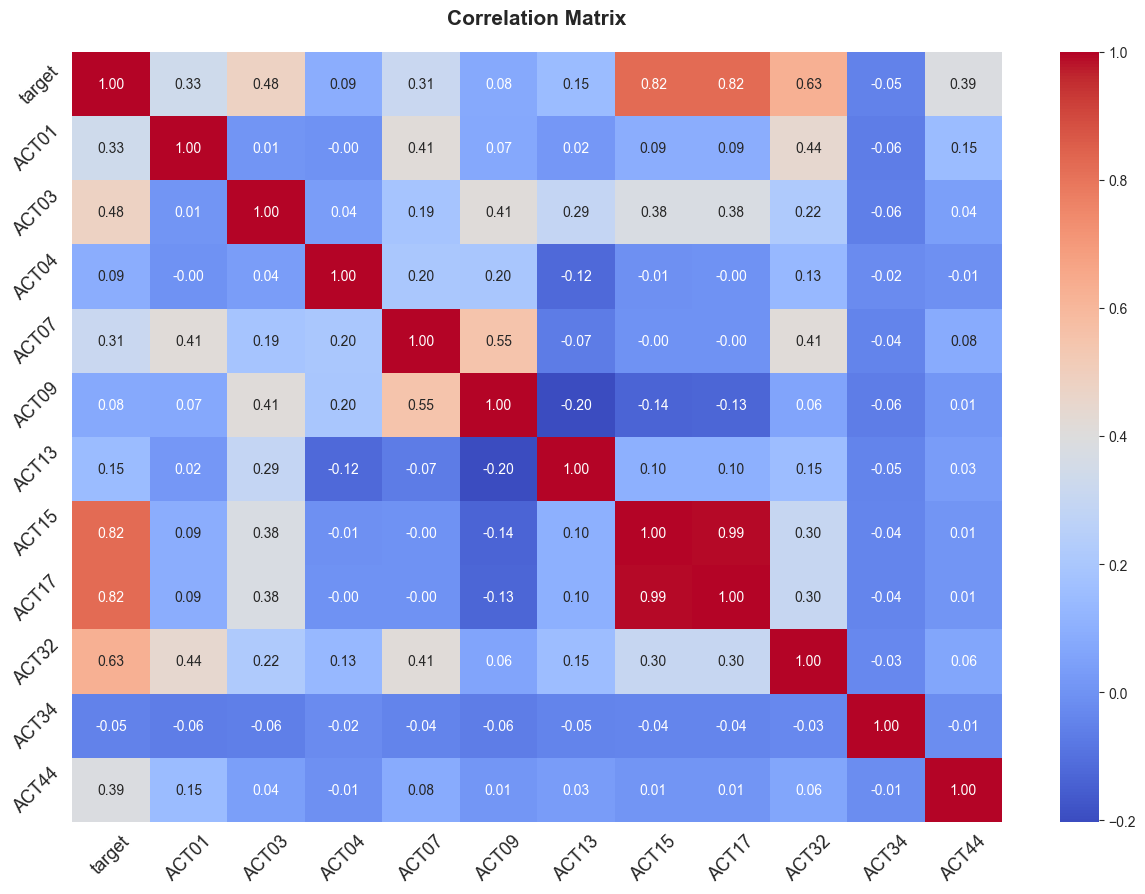

In [84]:
import seaborn as sns

# Subset del DataFrame con le colonne di interesse
df_subset = df_TS_week[['target', 'ACT01', 'ACT03', 'ACT04', 'ACT07', 'ACT09', 'ACT13', 'ACT15', 'ACT17', 'ACT32', 'ACT34', 'ACT44']]

# Calcolo della matrice di correlazione
df_corr = df_subset.corr()

# Plot della matrice di correlazione con i coefficienti nei quadrati
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.yticks(rotation=45, fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.title('Correlation Matrix', fontweight='bold', pad=20, fontsize=15)
plt.show()


In [64]:
# Move 'target' column to the 4 position
cols = list(df_TS_week.columns)
cols = cols[:2] + cols[-1:] + cols[2:-1]
df_TS_week = df_TS_week[cols]

# Show the first 5 rows
df_TS_week.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT34,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,0.0,58931.0


In [65]:
# Save the df_TS_week dataframe to a CSV file
df_TS_week.to_csv('../CSV/df_TS_week.csv', index=False)

# Check time series stazionarity

In [66]:
# Define the time series for the item_id 'IT01' of df_TS_week dataframe
time_series_IT01 = df_TS_week[df_TS_week['item_id'] == 'IT01']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_IT01)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")


ADF Statistic: -13.345693803875426
p-value: 5.80100725087089e-25
Critical Values:
   1%: -3.4691814633722453
   5%: -2.878595143532943
   10%: -2.5758625549741803
The time series is stationary (p-value <= 0.05).


In [67]:
# Define the time series for the item_id 'FR13' of df_TS_week dataframe
time_series_FR13 = df_TS_week[df_TS_week['item_id'] == 'FR13']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_FR13)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")


ADF Statistic: -4.057772011457501
p-value: 0.001136450420599753
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045
The time series is stationary (p-value <= 0.05).


In [68]:
# Define the time series for the item_id 'GB03' of df_TS_week dataframe
time_series_GB03 = df_TS_week[df_TS_week['item_id'] == 'GB02']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_GB03)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")


ADF Statistic: -3.179822371756673
p-value: 0.021182752790609896
Critical Values:
   1%: -3.471633386932248
   5%: -2.8796651107461972
   10%: -2.576433647235832
The time series is stationary (p-value <= 0.05).


In [69]:
# Define the time series for the item_id 'RO01' of df_TS_week dataframe
time_series_RO01 = df_TS_week[df_TS_week['item_id'] == 'RO01']['target']

# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series_RO01)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value: %s' % result[1])

# Print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")


ADF Statistic: -4.035210899397619
p-value: 0.0012369543069206013
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045
The time series is stationary (p-value <= 0.05).


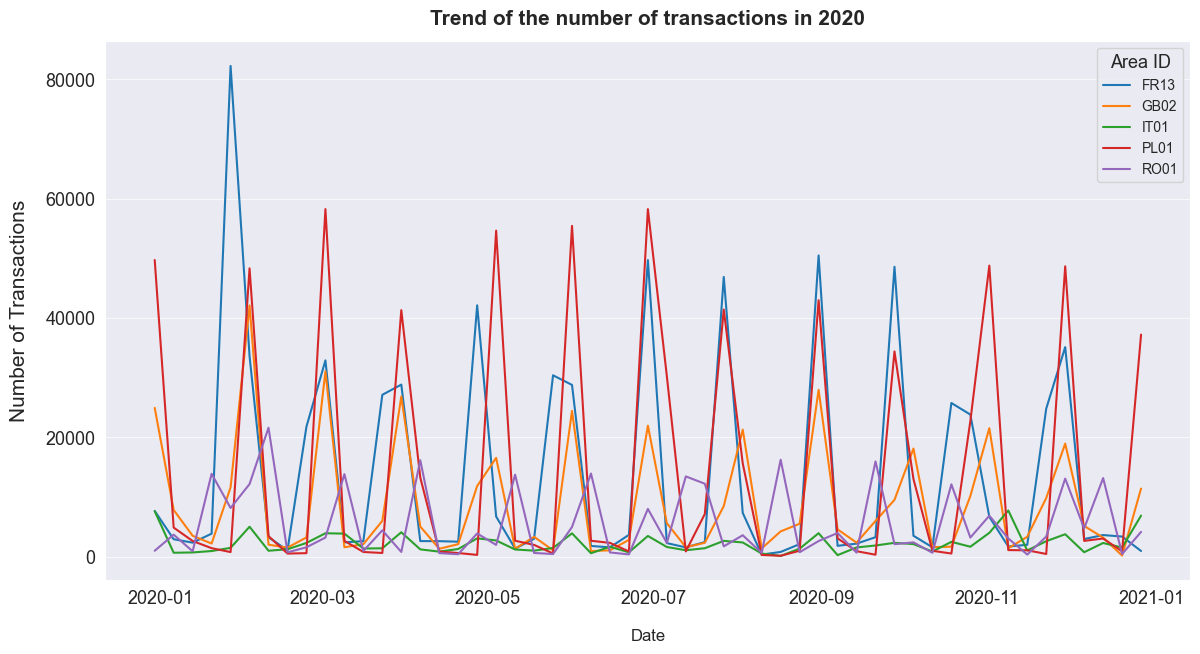

In [83]:
# Show the trend of the target variable for the 2020 year for each item_id
plt.figure(figsize=(14, 7))
for item_id in df_TS_week['item_id'].unique():
    plt.plot(df_TS_week[(df_TS_week['item_id'] == item_id) & (df_TS_week['timestamp'] < '2021-01-01')]['timestamp'],
             df_TS_week[(df_TS_week['item_id'] == item_id) & (df_TS_week['timestamp'] < '2021-01-01')]['target'],
             label=item_id)
    
plt.title('Trend of the number of transactions in 2020', fontsize=15, fontweight='bold', pad=12)
plt.xlabel('Date', fontsize=12, labelpad=15)
plt.ylabel('Number of Transactions', fontsize=15, labelpad=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Area ID', title_fontsize='13', fontsize='10')
plt.grid(axis='y', alpha=0.7)
plt.show()

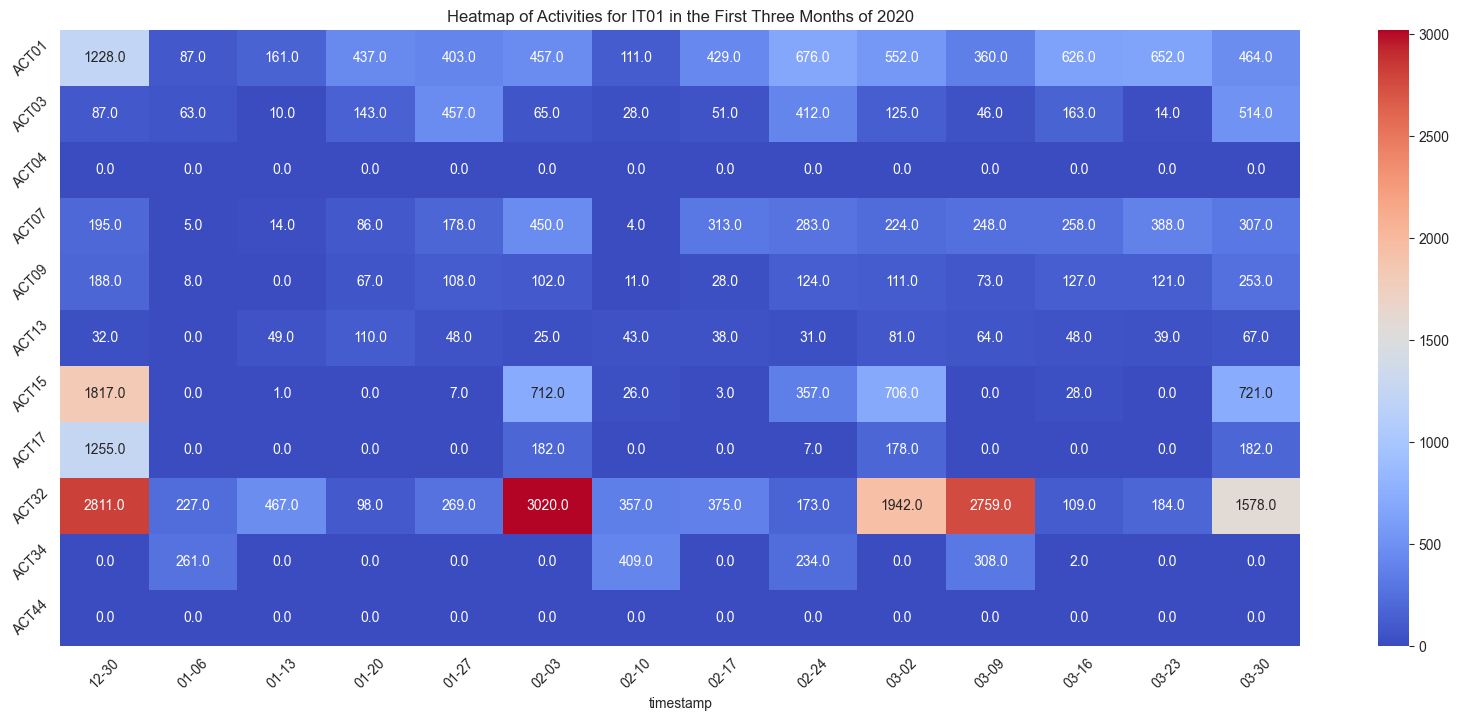

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the first three months of 2020 and item_id equal to 'IT01'
df_subset = df_TS_week[(df_TS_week['timestamp'].between('2019-12-29', '2020-03-31')) & (df_TS_week['item_id'] == 'IT01')]

# Convert timestamp to month-day format using loc
df_subset.loc[:, 'timestamp'] = df_subset['timestamp'].dt.strftime('%m-%d')

# Set the figure size
plt.figure(figsize=(20, 8))

# Create the heatmap
sns.heatmap(df_subset.set_index('timestamp')[['ACT01', 'ACT03', 'ACT04', 'ACT07', 'ACT09', 'ACT13', 'ACT15', 'ACT17', 'ACT32', 'ACT34', 'ACT44']].T, cmap='coolwarm', annot=True, fmt=".1f")

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set the title
plt.title('Heatmap of Activities for IT01 in the First Three Months of 2020')

# Show the plot
plt.show()


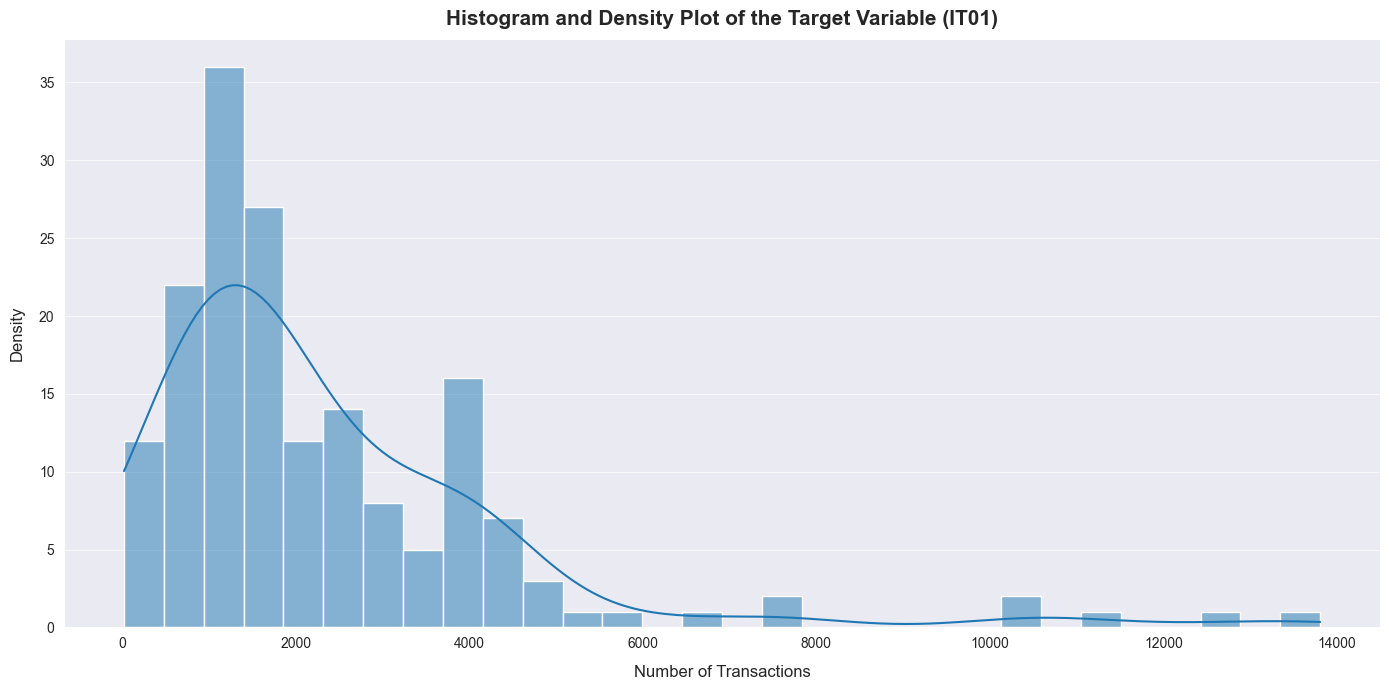

In [72]:
# Histogram and density plot of the target variable in df_TS_week with target greater than 0 and item_id equal to 'IT01'
plt.figure(figsize=(14, 7))
sns.histplot(df_TS_week[(df_TS_week['target'] > 0) & (df_TS_week['item_id'] == 'IT01')]['target'], kde=True, bins=30)
plt.title('Histogram and Density Plot of the Target Variable (IT01)', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Number of Transactions', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()



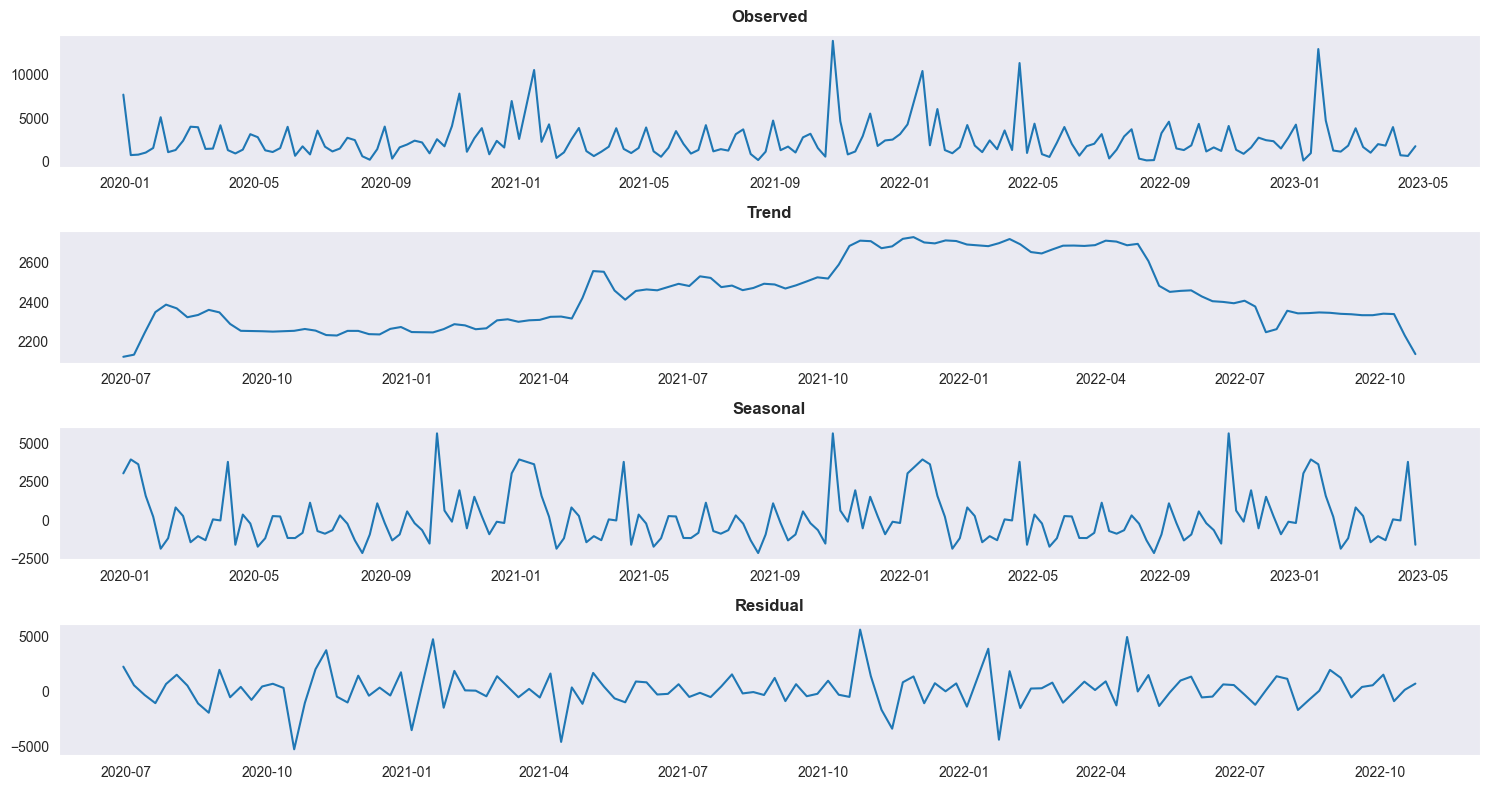

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Copy the dataframe df_TS_week to df_TS_week_IT01
df_TS_week_IT01 = df_TS_week.copy()

# Ensure that the 'timestamp' column is in datetime format
df_TS_week_IT01['timestamp'] = pd.to_datetime(df_TS_week_IT01['timestamp'])

# Set the 'timestamp' column as the index of the DataFrame
df_TS_week_IT01.set_index('timestamp', inplace=True)

# Select the time series data for the item_id 'IT01'
time_series_2020_IT = df_TS_week_IT01[(df_TS_week_IT01['item_id'] == 'IT01')]['target']

# Seasonal decomposition
result = seasonal_decompose(time_series_2020_IT, model='additive', period=52)

# Plot each component separately
plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed', fontsize=12, fontweight='bold', pad=10)

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend', fontsize=12, fontweight='bold', pad=10)

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal', fontsize=12, fontweight='bold', pad=10)

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual', fontsize=12, fontweight='bold', pad=10)

plt.tight_layout() 
plt.show()


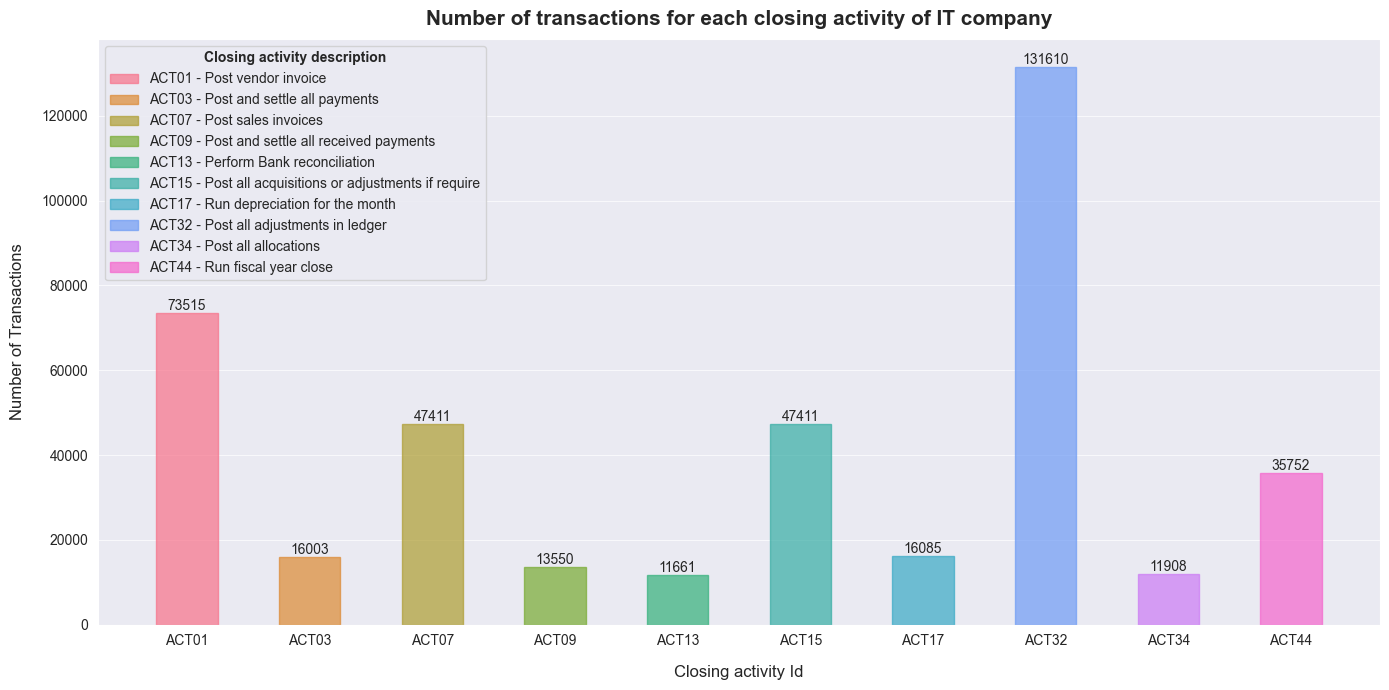

In [74]:
# Filter the DataFrame based on the specified conditions
filtered_df = df[(df['SubledgerVoucherDataAreaId'] == 'IT01') & (df['CreatedDateTime'] < '2023-05-01')]

# Create a dictionary mapping activity ID to list of descriptions
activity_description_dict = {}
for activity in filtered_df['ClosingActivityId'].unique():
    descriptions = filtered_df[filtered_df['ClosingActivityId'] == activity]['ClosingActivityDescription'].unique()
    activity_description_dict[activity] = descriptions

# Extract unique activity names
activity_names = sorted(filtered_df['ClosingActivityId'].unique()) 

# Extract transaction counts for each activity
activity_counts = [filtered_df[filtered_df['ClosingActivityId'] == activity]['ClosingActivityId'].count() for activity in activity_names]

# Define color map
colors = sns.color_palette("husl", len(activity_names))

# Define legend entries
legend_labels = []
for activity in activity_names:
    descriptions = ", ".join(activity_description_dict[activity])
    legend_labels.append(f'{activity} - {descriptions}')

# Plot histogram with seaborn style
plt.figure(figsize=(14, 7))
bars = plt.bar(activity_names, activity_counts, alpha=0.7, width=0.5, label=legend_labels)

# Set custom colors for bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Closing activity Id', fontsize=12, labelpad=12)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=12)
plt.title('Number of transactions for each closing activity of IT company', fontsize=15, fontweight='bold', pad=10)
plt.xticks(ha='center', fontsize=10)  
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)

# Add exact number of transactions on each bar
for i, count in enumerate(activity_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Plot legend
legend = plt.legend()
legend.set_title('Closing activity description', {'weight': 'bold'})

# Show the plot
plt.tight_layout()
plt.show()
